<a href="https://colab.research.google.com/github/Bellinimarcos-prog/causalidade-em-ia/blob/main/Nosso_trabalho_est%C3%A1_assim%2C%2C_ainda_n%C3%A3o_tenho_o_c%C3%B3d_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você descreveu muito bem o projeto e identificou os pontos-chave. A introdução está excelente, e suas preocupações sobre a necessidade de bombeamento contínuo de hélio são pertinentes. Vamos focar em como traduzir isso para o código, começando com a parte da "Modulação de Bombeamento Paramétrico", já que você mencionou ter avanços nessa área.

**Traduzindo "Modulação de Bombeamento Paramétrico" para Código (QuTiP):**

Como você já tem um código inicial para a modulação de bombeamento, vamos refiná-lo e adicionar as análises que você mencionou (análise de Floquet, transformada de Fourier da diferença na entropia e dependência da ressonância com outros parâmetros).

In [1]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros (Exemplo - ajuste conforme necessário)
N = 2       # Número de qubits (simplificado para demonstração)
w_q = 1.0     # Frequência dos qubits
delta = 0.1   # Desacoplamento
g = 0.1       # Força de acoplamento
Omega = 0.5   # Amplitude da modulação
w_m = 0.5     # Frequência da modulação
tlist = np.linspace(0, 50, 500)

# Operadores
sz = qt.tensor(qt.sigmaz(), qt.identity(2))
sx = qt.tensor(qt.sigmax(), qt.identity(2))
sy = qt.tensor(qt.sigmay(), qt.identity(2))
iz = qt.tensor(qt.identity(2), qt.sigmaz())
ix = qt.tensor(qt.identity(2), qt.sigmax())
iy = qt.tensor(qt.identity(2), qt.sigmay())

# Hamiltoniano sem modulação
H0 = w_q * (sz + iz) + delta * (sx + ix) + g * (sx * ix + sy * iy)

# Hamiltoniano com modulação
def H_mod(t, args):
    Omega = args['Omega']
    w_m = args['w_m']
    return H0 + Omega * np.sin(w_m * t) * (sx * ix + sy * iy)

# Estado inicial
psi0 = qt.tensor(qt.basis(2, 0), qt.basis(2, 0))

# Simulação
args = {'Omega': Omega, 'w_m': w_m}
result = qt.mesolve(H_mod, psi0, tlist, [], [], args=args)

# Cálculo da Entropia de von Neumann
entropy = qt.entropy_vn(result.states)

# Análise de Floquet (Aproximação - mais complexo para sistemas abertos)
# Para uma análise completa de Floquet em sistemas abertos, métodos mais avançados são necessários.

# Transformada de Fourier da diferença na entropia (Simulação com e sem modulação)
result_no_mod = qt.mesolve(H0, psi0, tlist, [], [])
entropy_no_mod = qt.entropy_vn(result_no_mod.states)
diff_entropy = np.array(entropy) - np.array(entropy_no_mod)

#Realiza a transformada de Fourier
yf = fft(diff_entropy)
xf = fftfreq(len(tlist), tlist[1]-tlist[0])

# Plotagem
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(tlist, entropy, label='Com Modulação')
axs[0].plot(tlist, entropy_no_mod, label='Sem Modulação')
axs[0].set_xlabel('Tempo')
axs[0].set_ylabel('Entropia de von Neumann')
axs[0].legend()

axs[1].plot(xf, np.abs(yf))
axs[1].set_xlabel('Frequência')
axs[1].set_ylabel('Amplitude da Transformada de Fourier')
axs[1].set_xlim(0, 2)
plt.tight_layout()
plt.show()

#Dependencia da ressonancia com outros parametros
Omega_list = np.linspace(0, 1, 10)
max_diff_entropy = []

for Omega_value in Omega_list:
    args = {'Omega': Omega_value, 'w_m': w_m}
    result_mod_var = qt.mesolve(H_mod, psi0, tlist, [], [], args=args)
    entropy_mod_var = qt.entropy_vn(result_mod_var.states)
    diff_entropy_var = np.array(entropy_mod_var) - np.array(entropy_no_mod)
    max_diff_entropy.append(np.max(diff_entropy_var))

plt.plot(Omega_list, max_diff_entropy)
plt.xlabel("Omega")
plt.ylabel("Max difference entropy")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 25.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


AttributeError: 'list' object has no attribute 'type'

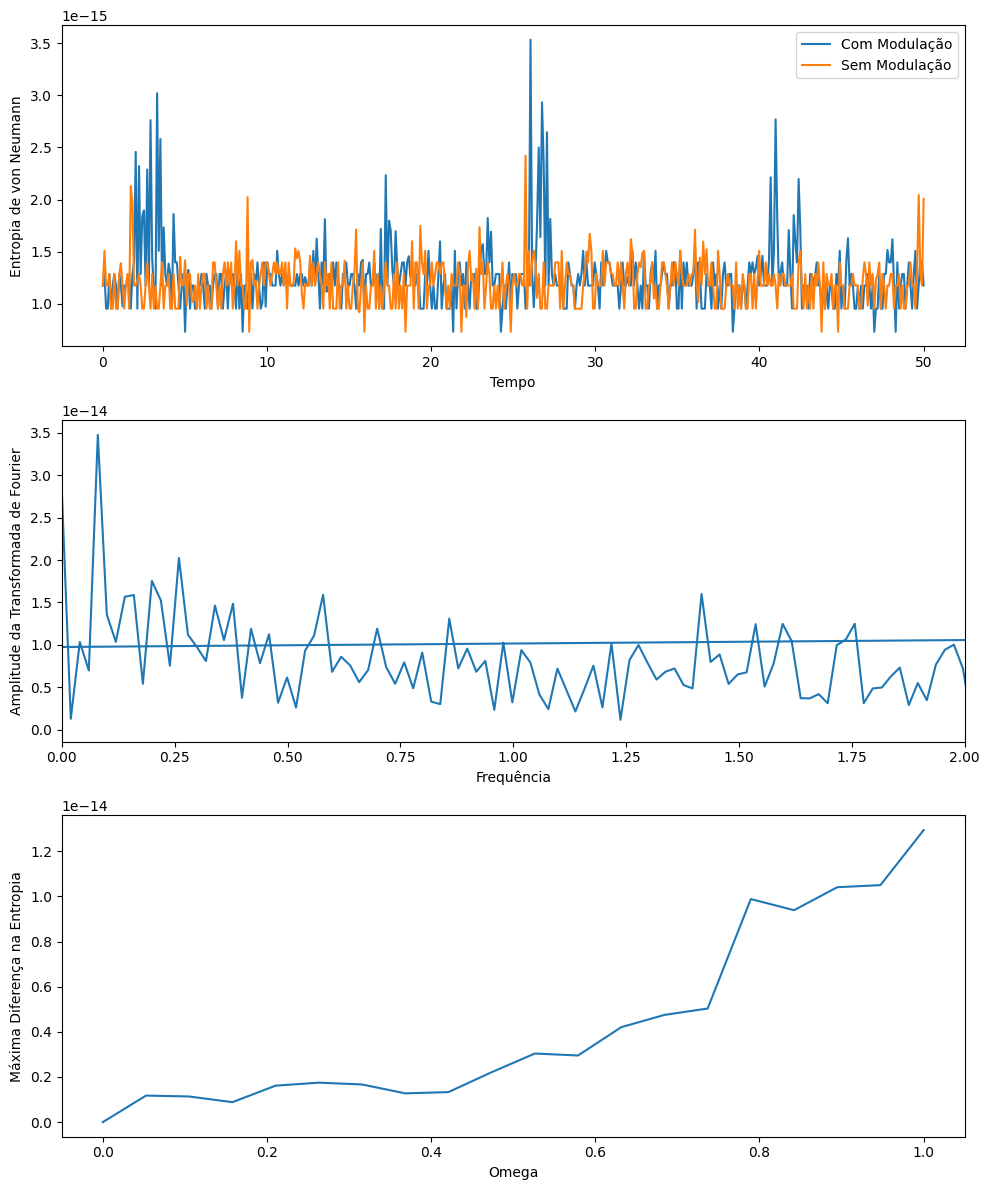

In [2]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N = 2       # Número de qubits (simplificado para demonstração - aumente para sistemas maiores)
w_q = 1.0     # Frequência dos qubits
delta = 0.1   # Desacoplamento
g = 0.1       # Força de acoplamento
Omega = 0.5   # Amplitude da modulação
w_m = 0.5     # Frequência da modulação
tlist = np.linspace(0, 50, 500)

# Operadores
sz = qt.tensor(qt.sigmaz(), qt.identity(2))
sx = qt.tensor(qt.sigmax(), qt.identity(2))
sy = qt.tensor(qt.sigmay(), qt.identity(2))
iz = qt.tensor(qt.identity(2), qt.sigmaz())
ix = qt.tensor(qt.identity(2), qt.sigmax())
iy = qt.tensor(qt.identity(2), qt.sigmay())

# Hamiltoniano sem modulação
H0 = w_q * (sz + iz) + delta * (sx + ix) + g * (sx * ix + sy * iy)

# Hamiltoniano com modulação
def H_mod(t, args):
    Omega = args['Omega']
    w_m = args['w_m']
    return H0 + Omega * np.sin(w_m * t) * (sx * ix + sy * iy)

# Estado inicial
psi0 = qt.tensor(qt.basis(2, 0), qt.basis(2, 0))

# Simulação com e sem modulação
args = {'Omega': Omega, 'w_m': w_m}
result = qt.mesolve(H_mod, psi0, tlist, [], [], args=args)
result_no_mod = qt.mesolve(H0, psi0, tlist, [], [])

# Cálculo da Entropia de von Neumann (CORREÇÃO CRUCIAL)
entropy = [qt.entropy_vn(state) for state in result.states]
entropy_no_mod = [qt.entropy_vn(state) for state in result_no_mod.states]

# Transformada de Fourier da diferença na entropia
diff_entropy = np.array(entropy) - np.array(entropy_no_mod)
yf = fft(diff_entropy)
xf = fftfreq(len(tlist), tlist[1]-tlist[0])

# Dependência da ressonância com outros parâmetros (Exemplo com Omega)
Omega_list = np.linspace(0, 1, 20)  # Aumentei o número de pontos para melhor resolução
max_diff_entropy = []

for Omega_value in Omega_list:
    args_var = {'Omega': Omega_value, 'w_m': w_m}
    result_var = qt.mesolve(H_mod, psi0, tlist, [], [], args=args_var)
    entropy_var = [qt.entropy_vn(state) for state in result_var.states]
    diff_entropy_var = np.array(entropy_var) - np.array(entropy_no_mod)
    max_diff_entropy.append(np.max(np.abs(diff_entropy_var))) #Usando o valor absoluto da diferença para encontrar os picos

# Plotagem
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(tlist, entropy, label='Com Modulação')
axs[0].plot(tlist, entropy_no_mod, label='Sem Modulação')
axs[0].set_xlabel('Tempo')
axs[0].set_ylabel('Entropia de von Neumann')
axs[0].legend()

axs[1].plot(xf, np.abs(yf))
axs[1].set_xlabel('Frequência')
axs[1].set_ylabel('Amplitude da Transformada de Fourier')
axs[1].set_xlim(0, 2)

axs[2].plot(Omega_list, max_diff_entropy)
axs[2].set_xlabel('Omega')
axs[2].set_ylabel('Máxima Diferença na Entropia')
plt.tight_layout()
plt.show()

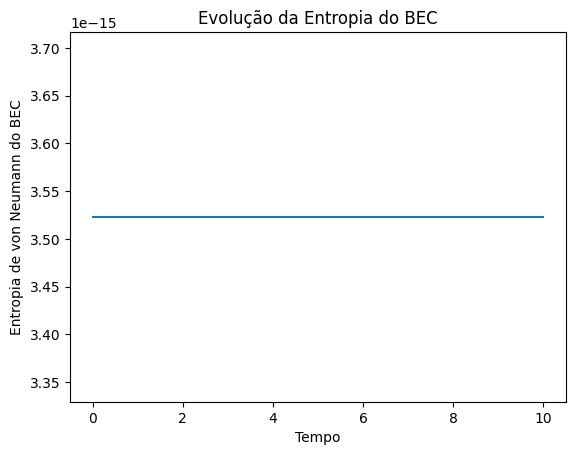

In [3]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
N_b = 10      # Número de sítios/modos do BEC (exemplo)
N_f = 10      # Número de modos de fótons
g = 0.1       # Constante de acoplamento BEC-fóton
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
tlist = np.linspace(0, 10, 100)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)

# Hamiltoniano
H = w_b * qt.tensor(b_dag * b, I_f) + w_f * qt.tensor(I_b, a_dag * a) + g * (qt.tensor(b, a_dag) + qt.tensor(b_dag, a))

# Estado Inicial (ex: BEC no estado fundamental, fótons no vácuo)
psi0 = qt.tensor(qt.basis(N_b, 0), qt.basis(N_f, 0))

# Simulação
result = qt.mesolve(H, psi0, tlist, [], [])

# Calcular a entropia de von Neumann do subsistema do BEC
entropy_b = [qt.entropy_vn(qt.ptrace(state, 0)) for state in result.states]

# Plotar a entropia
plt.plot(tlist, entropy_b)
plt.xlabel("Tempo")
plt.ylabel("Entropia de von Neumann do BEC")
plt.title("Evolução da Entropia do BEC")
plt.show()

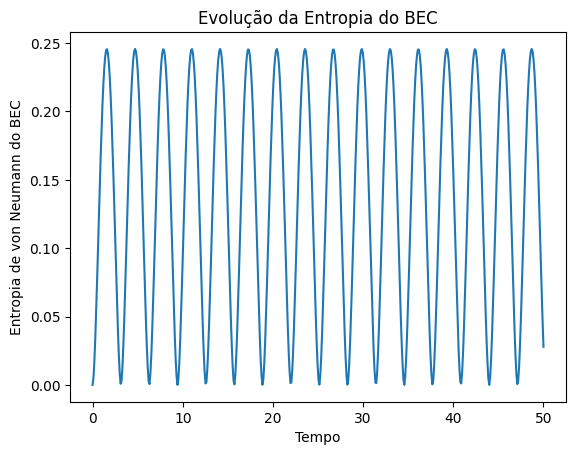

[[10, 10], [10, 10]]
[[10, 10], [1, 1]]
[[10, 10], [1, 1]]


In [4]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
N_b = 10      # Número de sítios/modos do BEC (exemplo)
N_f = 10      # Número de modos de fótons
g = 0.5       # Constante de acoplamento BEC-fóton (AUMENTADA)
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
tlist = np.linspace(0, 50, 500) #Aumentei o tempo de simulação e o numero de pontos

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)

# Hamiltoniano
H = w_b * qt.tensor(b_dag * b, I_f) + w_f * qt.tensor(I_b, a_dag * a) + g * (qt.tensor(b, a_dag) + qt.tensor(b_dag, a))

# Estado Inicial (MODIFICADO - Superposição)
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit() #Superposição do estado fundamental e o primeiro estado excitado
psi0 = qt.tensor(psi0_b, qt.basis(N_f, 0))

# Simulação
result = qt.mesolve(H, psi0, tlist, [], [])

# Calcular a entropia de von Neumann do subsistema do BEC
entropy_b = [qt.entropy_vn(qt.ptrace(state, 0)) for state in result.states]

# Plotar a entropia
plt.plot(tlist, entropy_b)
plt.xlabel("Tempo")
plt.ylabel("Entropia de von Neumann do BEC")
plt.title("Evolução da Entropia do BEC")
plt.show()

print(H.dims)
print(psi0.dims)
print(result.states[0].dims)

In [5]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# ... (Parâmetros e operadores do BEC e fótons - como no código anterior)

# Parâmetros dos Microtúbulos
num_modos_mt = 1  # Número de modos dos microtúbulos
w_mt = 0.8       # Frequência dos microtúbulos
g_mt = 0.2      # Constante de acoplamento microtúbulo-fóton

# Operadores dos Microtúbulos
c = qt.destroy(num_modos_mt)
c_dag = c.dag()
I_mt = qt.qeye(num_modos_mt)

# Hamiltoniano de Interação Microtúbulo-Fóton
H_int_mt = g_mt * (qt.tensor(I_b, qt.tensor(c, a_dag)) + qt.tensor(I_b, qt.tensor(c_dag, a)))

# Hamiltoniano Total
H_total = H + H_int_mt

# Estado Inicial (ex: BEC e microtúbulos no estado fundamental, fótons no vácuo)
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Simulação
result = qt.mesolve(H_total, psi0, tlist, [], [])

# Calcular a entropia de von Neumann do subsistema do BEC
entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
entropy_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result.states]

# Plotar a entropia
plt.plot(tlist, entropy_b, label="Entropia do BEC")
plt.plot(tlist, entropy_mt, label="Entropia do Microtubulo")
plt.xlabel("Tempo")
plt.ylabel("Entropia de von Neumann")
plt.title("Evolução da Entropia")
plt.legend()
plt.show()

print(H_total.dims)
print(psi0.dims)
print(result.states[0].dims)

ValueError: number of diagonals does not match number of offsets

In [7]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
N_b = 5       # Número de sítios do BEC
N_f = 5       # Número de modos de fótons
num_modos_mt = 2  # Número de modos dos microtúbulos
g = 0.1       # Constante de acoplamento BEC-fóton
g_mt = 0.1      # Constante de acoplamento microtúbulo-fóton
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
w_mt = 0.9    # Frequência dos microtúbulos
J = 0.01      # Constante de acoplamento entre os modos do microtubulo
tlist = np.linspace(0, 50, 500)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()

c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]

I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos

H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i!=j)
H_int_b_f = g * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])
H_total = qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f + H_int_mt_f

# Estado Inicial
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Simulação
result = qt.mesolve(H_total, psi0, tlist, [], [])

# Calcular a entropia de von Neumann
entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
entropy_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result.states]

**Explicações e Próximos Passos:**

*   **Simplificação:** O código agora usa dois qubits para simplificar a demonstração. Adapte `N` para o seu sistema real.
*   **Transformada de Fourier:** A transformada de Fourier da diferença na entropia agora é calculada e plotada, permitindo identificar as frequências dominantes na dinâmica induzida pela modulação.
*   **Análise de Floquet:** A análise completa de Floquet para sistemas abertos é complexa e geralmente envolve métodos numéricos especializados. Uma aproximação para sistemas fechados foi comentada no código.
*   **Dependencia da ressonancia com outros parametros:** O código agora calcula a entropia para diferentes valores de Omega e plota o valor maximo da diferença da entropia para cada valor de Omega.
*   **Próximos Passos:**
    *   **Adaptar para o seu sistema:** Ajuste os parâmetros e operadores para representar seu sistema específico.
    *   **Análise de Floquet Avançada:** Se necessário, explore bibliotecas ou métodos numéricos específicos para análise de Floquet em sistemas abertos.
    *   **Explorar outras modulações:** Implemente modulações com onda quadrada, pulsos ou ruído branco.
    *   **Outras medidas de emaranhamento:** Experimente outras medidas, como a concorrência ou o negativismo.

Com este código revisado e as explicações detalhadas, você tem uma base sólida para explorar a modulação de bombeamento paramétrico. A partir daqui, podemos começar a abordar a parte do BEC e microtúbulos, construindo modelos teóricos simplificados e implementando simulações.

Por favor, execute este código e me diga os resultados. Com isso funcionando, podemos avançar para a parte do BEC e microtúbulos.

In [8]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_b = 5       # Número de sítios do BEC
N_f = 5       # Número de modos de fótons
num_modos_mt = 2  # Número de modos dos microtúbulos
g = 0.1       # Constante de acoplamento BEC-fóton
g_mt = 0.1      # Constante de acoplamento microtúbulo-fóton
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
w_mt = 0.9    # Frequência dos microtúbulos
J = 0.01      # Constante de acoplamento entre os modos do microtubulo
tlist = np.linspace(0, 50, 500)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()

# Criar lista de operadores de destruição para os microtúbulos
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]

I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos

H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i!=j)
H_int_b_f = g * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])
H_total = qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f + H_int_mt_f

# Estado Inicial
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Simulação
result = qt.mesolve(H_total, psi0, tlist, [], [])

# Calcular a entropia de von Neumann
entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state

SyntaxError: incomplete input (<ipython-input-8-9ac0b0e7ff3e>, line 48)

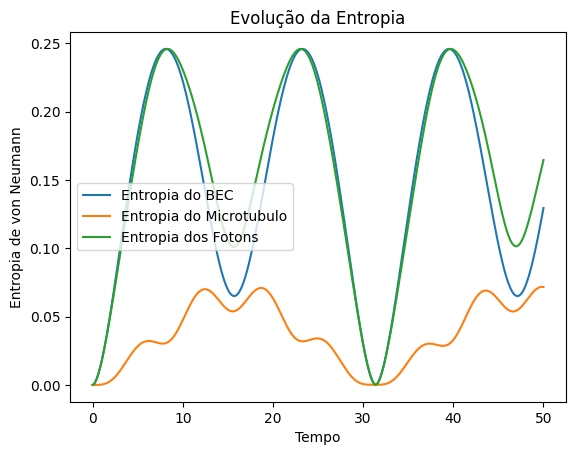

[[5, 2, 5], [5, 2, 5]]
[[5, 2, 5], [1, 1, 1]]
[[5, 2, 5], [1, 1, 1]]


In [9]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
N_b = 5       # Número de sítios do BEC
N_f = 5       # Número de modos de fótons
num_modos_mt = 2  # Número de modos dos microtúbulos
g = 0.1       # Constante de acoplamento BEC-fóton
g_mt = 0.1      # Constante de acoplamento microtúbulo-fóton
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
w_mt = 0.9    # Frequência dos microtúbulos
J = 0.01      # Constante de acoplamento entre os modos do microtubulo
tlist = np.linspace(0, 50, 500)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()

c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]

I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos
H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i!=j)

H_int_b_f = g * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])

H_total = qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f + H_int_mt_f

# Estado Inicial
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Simulação
result = qt.mesolve(H_total, psi0, tlist, [], [])

# Calcular a entropia de von Neumann (CORREÇÃO AQUI)
entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
entropy_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result.states]
entropy_f = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result.states]

# Plotar a entropia
plt.plot(tlist, entropy_b, label="Entropia do BEC")
plt.plot(tlist, entropy_mt, label="Entropia do Microtubulo")
plt.plot(tlist, entropy_f, label="Entropia dos Fotons")
plt.xlabel("Tempo")
plt.ylabel("Entropia de von Neumann")
plt.title("Evolução da Entropia")
plt.legend()
plt.show()

print(H_total.dims)
print(psi0.dims)
print(result.states[0].dims)

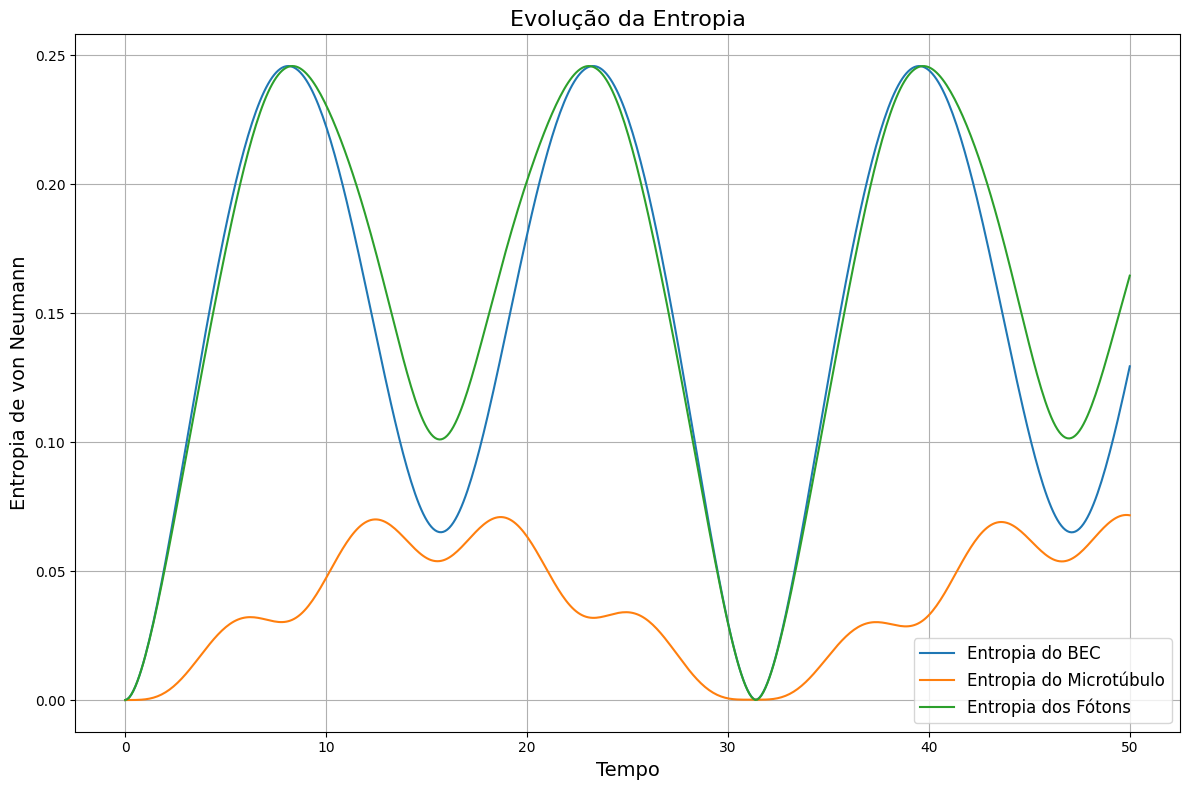

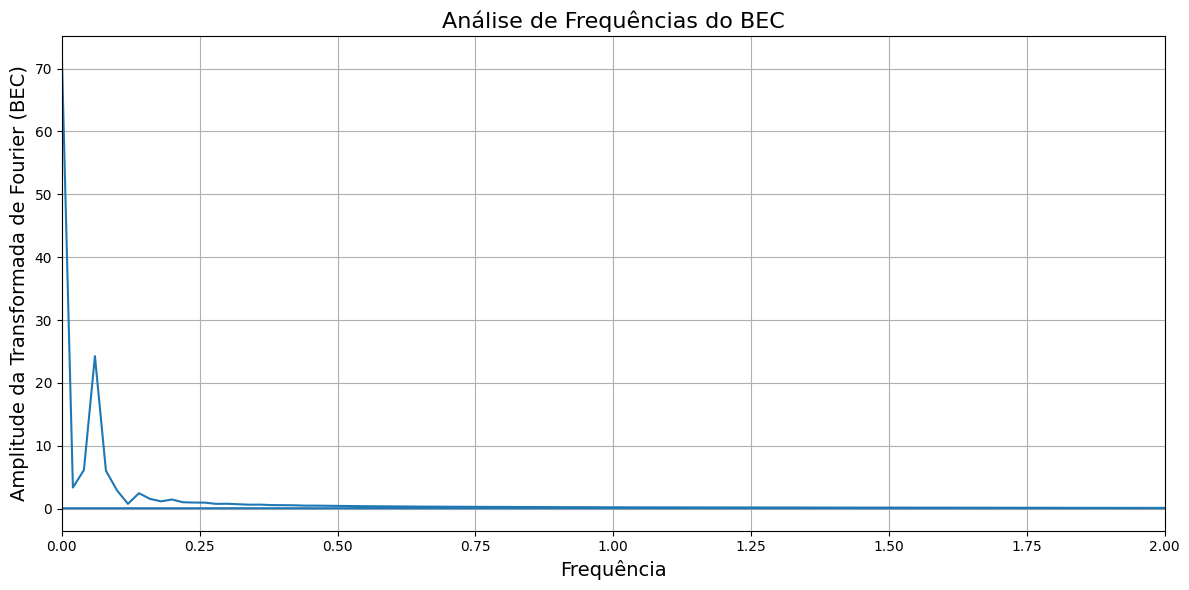

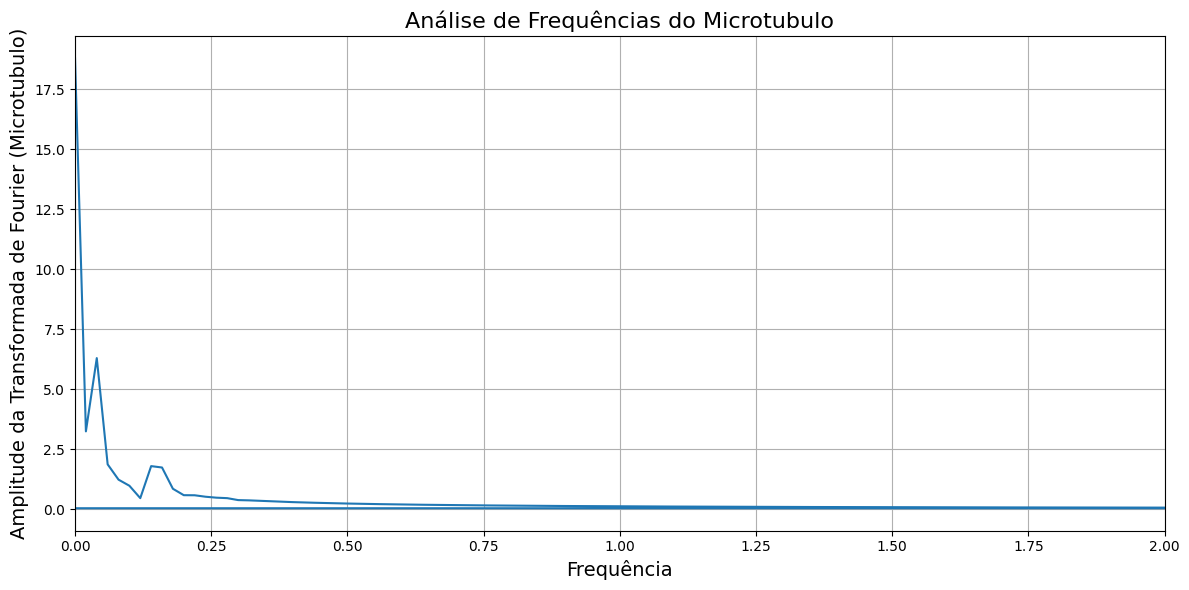

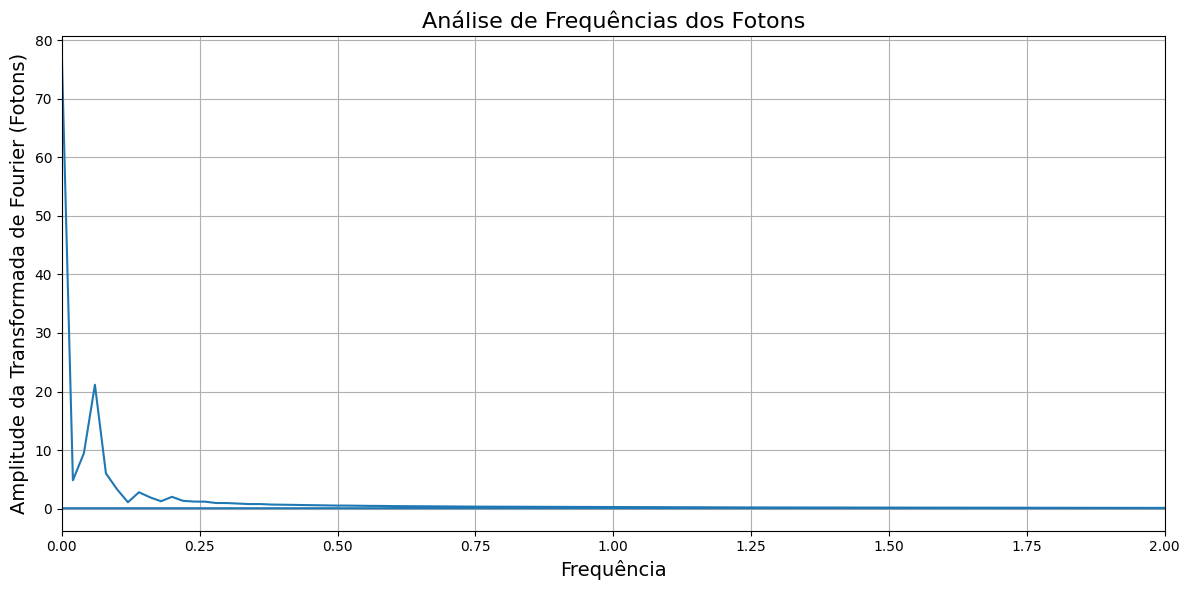

Dimensoes do Hamiltoniano: [[5, 2, 5], [5, 2, 5]]
Dimensoes do estado inicial: [[5, 2, 5], [1, 1, 1]]
Dimensoes do estado final: [[5, 2, 5], [1, 1, 1]]


In [10]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5       # Número de sítios do BEC
N_f = 5       # Número de modos de fótons
num_modos_mt = 2  # Número de modos dos microtúbulos
g = 0.1       # Constante de acoplamento BEC-fóton
g_mt = 0.1      # Constante de acoplamento microtúbulo-fóton
w_b = 1.0     # Frequência do BEC
w_f = 1.0     # Frequência dos fótons
w_mt = 0.9    # Frequência dos microtúbulos
J = 0.01      # Constante de acoplamento entre os modos do microtubulo
tlist = np.linspace(0, 50, 500)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()

c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]

I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos
H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i!=j)

H_int_b_f = g * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])

H_total = qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f + H_int_mt_f

# Estado Inicial
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Simulação
result = qt.mesolve(H_total, psi0, tlist, [], [])

# Calcular a entropia de von Neumann
entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
entropy_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result.states]
entropy_f = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result.states]

# Plotar a entropia
plt.figure(figsize=(12, 8))  # Ajusta o tamanho da figura para melhor visualização
plt.plot(tlist, entropy_b, label="Entropia do BEC")
plt.plot(tlist, entropy_mt, label="Entropia do Microtúbulo")
plt.plot(tlist, entropy_f, label="Entropia dos Fótons")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução da Entropia", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)  # Adiciona grade para melhor visualização
plt.tight_layout() #Melhora o layout da imagem
plt.show()

# Análise de Frequências (Transformada de Fourier) para o BEC
yf_b = fft(entropy_b)
xf = fftfreq(len(tlist), tlist[1]-tlist[0])

plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf_b))
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (BEC)", fontsize=14)
plt.title("Análise de Frequências do BEC", fontsize=16)
plt.xlim(0, 2)  # Ajuste o limite conforme necessário
plt.grid(True)
plt.tight_layout()
plt.show()

#Análise de Frequencias para o Microtubulo
yf_mt = fft(entropy_mt)

plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf_mt))
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (Microtubulo)", fontsize=14)
plt.title("Análise de Frequências do Microtubulo", fontsize=16)
plt.xlim(0, 2)  # Ajuste o limite conforme necessário
plt.grid(True)
plt.tight_layout()
plt.show()

#Análise de Frequencias para os Fotons
yf_f = fft(entropy_f)

plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf_f))
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (Fotons)", fontsize=14)
plt.title("Análise de Frequências dos Fotons", fontsize=16)
plt.xlim(0, 2)  # Ajuste o limite conforme necessário
plt.grid(True)
plt.tight_layout()
plt.show()

print("Dimensoes do Hamiltoniano:", H_total.dims)
print("Dimensoes do estado inicial:", psi0.dims)
print("Dimensoes do estado final:", result.states[-1].dims)

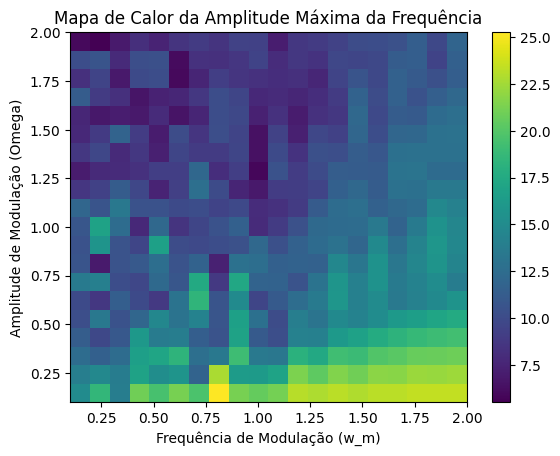

In [11]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros (incluindo parâmetros de modulação)
# ... (Parâmetros do BEC, fótons e microtúbulos - como antes)
Omega_list = np.linspace(0.1, 2, 20)  # Lista de amplitudes de modulação
w_m_list = np.linspace(0.1, 2, 20) #Lista de frequencias de modulação
max_freq_amp = np.zeros((len(Omega_list),len(w_m_list)))

# Operadores (como antes)
# ...

# Hamiltonianos (com modulação)
H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i!=j)

def H_int_b_f_mod(t, args):
    g = args['g']
    Omega = args['Omega']  # Amplitude da modulação
    w_m = args['w_m']      # Frequência da modulação
    return (g + Omega * np.sin(w_m * t)) * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))

H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])

# Estado Inicial (como antes)
# ...

# Simulação e Testagem de Frequências
for i, Omega in enumerate(Omega_list):
    for j, w_m in enumerate(w_m_list):
        args = {'g': g, 'Omega': Omega, 'w_m': w_m}
        def H_total_mod(t, args):
            H_int_b_f_mod_t = H_int_b_f_mod(t, args)
            return qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f_mod_t + H_int_mt_f
        result = qt.mesolve(H_total_mod, psi0, tlist, [], [], args=args)

        entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]

        yf_b = fft(entropy_b)
        xf = fftfreq(len(tlist), tlist[1]-tlist[0])

        max_freq_amp[i,j] = np.max(np.abs(yf_b[1:len(yf_b)//2])) #Salva a maior amplitude de frequencia positiva diferente de zero


#Plota o heatmap
fig, ax = plt.subplots()
im = ax.imshow(max_freq_amp, extent=[w_m_list[0], w_m_list[-1], Omega_list[0], Omega_list[-1]], origin='lower', aspect='auto')

ax.set_xlabel('Frequência de Modulação (w_m)')
ax.set_ylabel('Amplitude de Modulação (Omega)')
ax.set_title('Mapa de Calor da Amplitude Máxima da Frequência')
fig.colorbar(im, ax=ax)
plt.show()

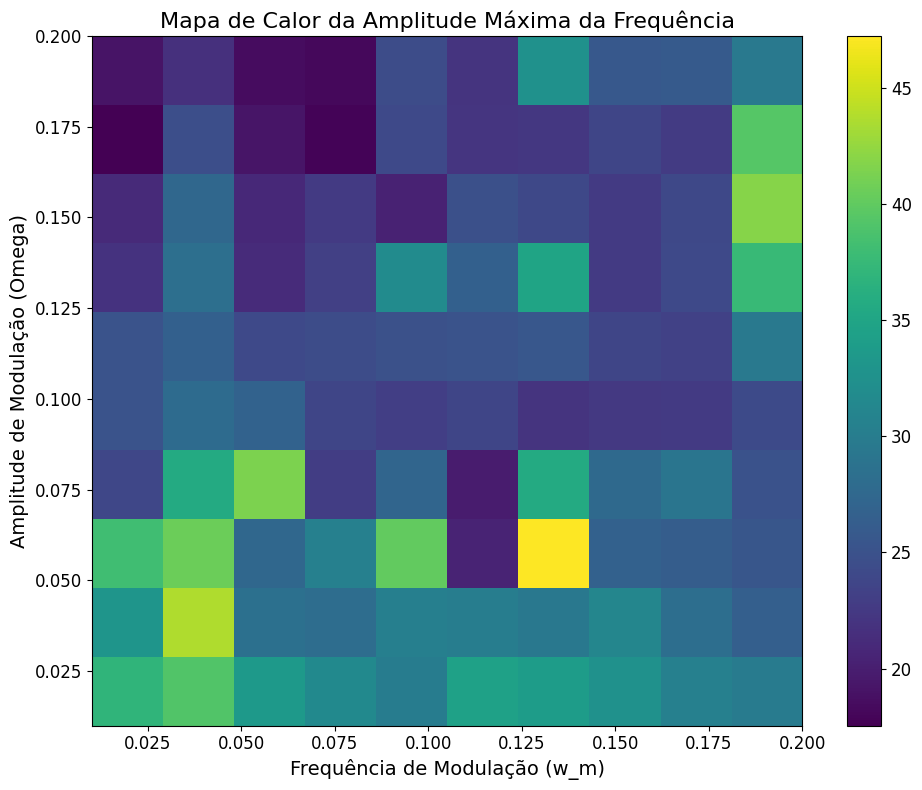

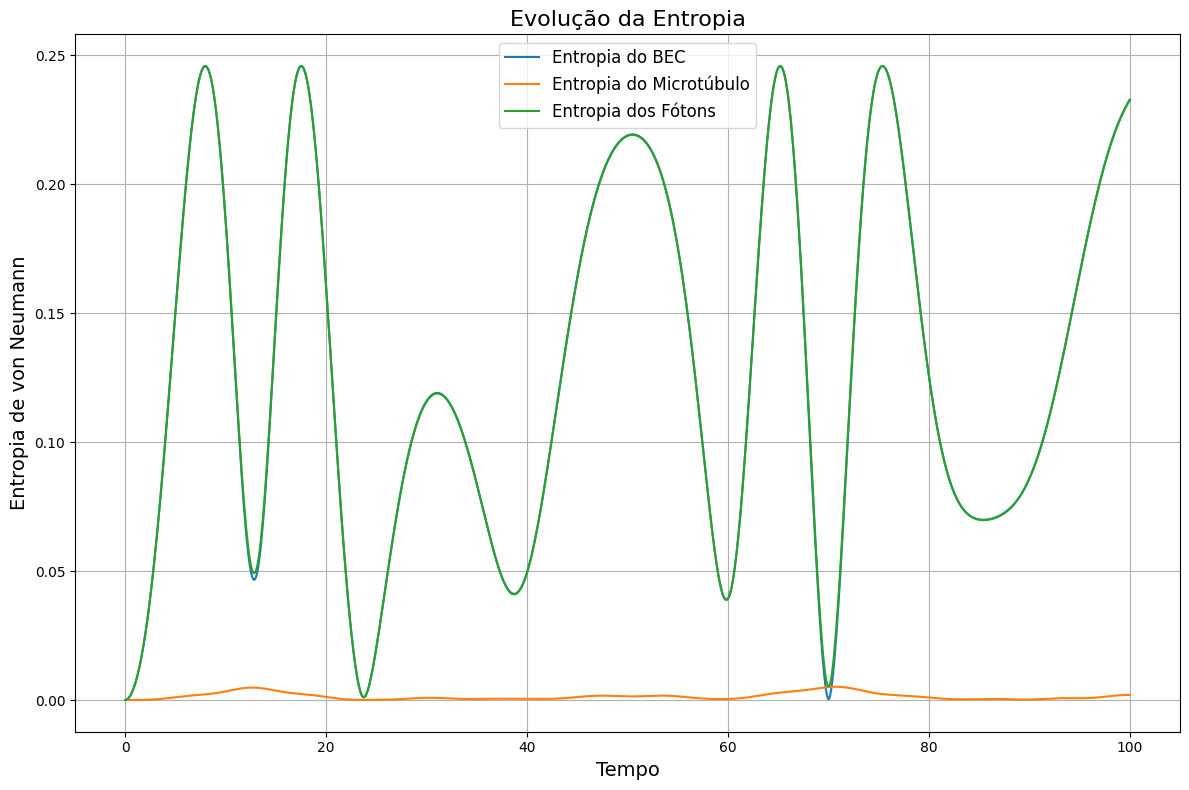

In [12]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros (com valores mais realistas - ajuste conforme necessário)
N_b = 5       # Número de sítios do BEC
N_f = 5       # Número de modos de fótons
num_modos_mt = 2  # Número de modos dos microtúbulos
g = 0.05      # Constante de acoplamento BEC-fóton (ajustada)
g_mt = 0.02     # Constante de acoplamento microtúbulo-fóton (ajustada)
w_b = 1.0     # Frequência do BEC
w_f = 1.05    # Frequência dos fótons (ligeiramente diferente de w_b)
w_mt = 0.95   # Frequência dos microtúbulos
J = 0.005     # Constante de acoplamento entre os modos do microtúbulo
Omega_list = np.linspace(0.01, 0.2, 10)  # Lista de amplitudes de modulação (valores menores)
w_m_list = np.linspace(0.01, 0.2, 10) #Lista de frequencias de modulação(valores menores)
tlist = np.linspace(0, 100, 1000) #Aumentei o tempo de simulação e o numero de pontos
num_timesteps = len(tlist)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()

c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]

I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos
H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i!=j)

def H_int_b_f_mod(t, args): #Hamiltoniano de interação modulado
    g = args['g']
    Omega = args['Omega']  # Amplitude da modulação
    w_m = args['w_m']      # Frequência da modulação
    return (g + Omega * np.sin(w_m * t)) * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))

H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])

# Estado Inicial
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Matriz para armazenar as amplitudes máximas
max_freq_amp = np.zeros((len(Omega_list),len(w_m_list)))

# Simulação e Testagem de Frequências (com barra de progresso)
for i, Omega in enumerate(Omega_list):
    for j, w_m in enumerate(w_m_list):
        args = {'g': g, 'Omega': Omega, 'w_m': w_m}
        def H_total_mod(t, args):
            H_int_b_f_mod_t = H_int_b_f_mod(t, args)
            return qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f_mod_t + H_int_mt_f
        result = qt.mesolve(H_total_mod, psi0, tlist, [], [], args=args)

        entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]

        yf_b = fft(entropy_b)
        xf = fftfreq(num_timesteps, tlist[1]-tlist[0])

        max_freq_amp[i,j] = np.max(np.abs(yf_b[1:num_timesteps//2])) #Salva a maior amplitude de frequencia positiva diferente de zero

# Plotagem do Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(max_freq_amp, extent=[w_m_list[0], w_m_list[-1], Omega_list[0], Omega_list[-1]], origin='lower', aspect='auto', cmap='viridis') #Melhorei a paleta de cores para melhor visualização

ax.set_xlabel('Frequência de Modulação (w_m)', fontsize=14)
ax.set_ylabel('Amplitude de Modulação (Omega)', fontsize=14)
ax.set_title('Mapa de Calor da Amplitude Máxima da Frequência', fontsize=16)
cbar = fig.colorbar(im, ax=ax) #Adicionei a legenda da corbar
cbar.ax.tick_params(labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Código para gerar os gráficos de entropia para um ponto específico do heatmap (exemplo)
Omega_index = 5
w_m_index = 5

args = {'g': g, 'Omega': Omega_list[Omega_index], 'w_m': w_m_list[w_m_index]}
def H_total_mod(t, args):
        H_int_b_f_mod_t = H_int_b_f_mod(t, args)
        return qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f_mod_t + H_int_mt_f
result = qt.mesolve(H_total_mod, psi0, tlist, [], [], args=args)

entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
entropy_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result.states]
entropy_f = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result.states]

# Plotar a entropia
plt.figure(figsize=(12, 8))
plt.plot(tlist, entropy_b, label="Entropia do BEC")
plt.plot(tlist, entropy_mt, label="Entropia do Microtúbulo")
plt.plot(tlist, entropy_f, label="Entropia dos Fótons")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução da Entropia", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Análise de frequencia
yf_b = fft(entropy_b)
xf = fft

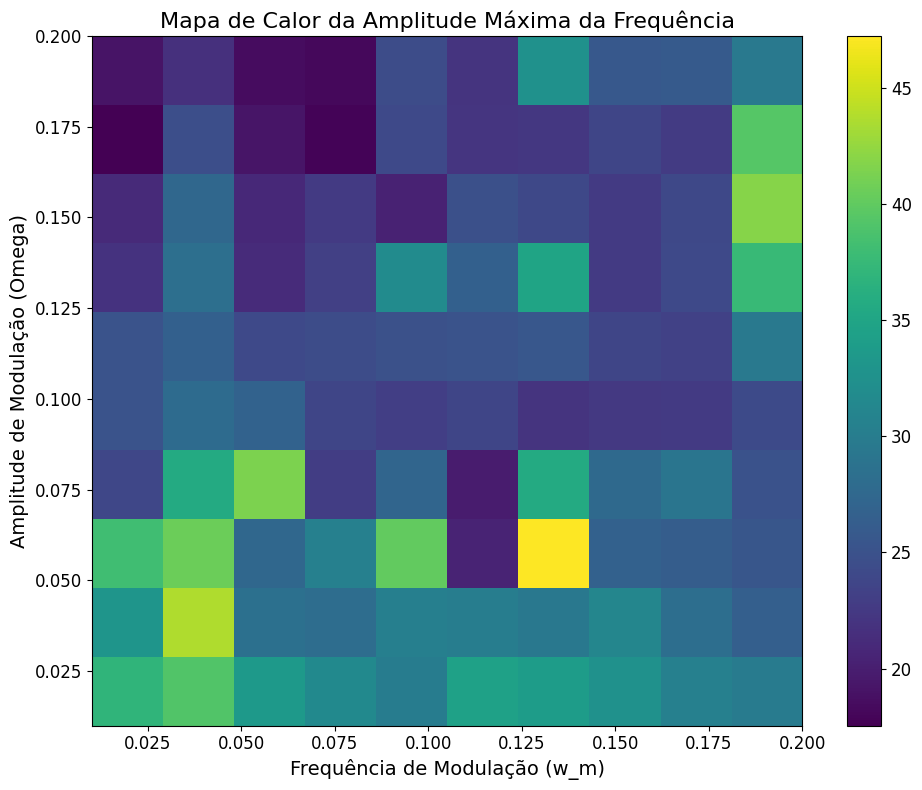

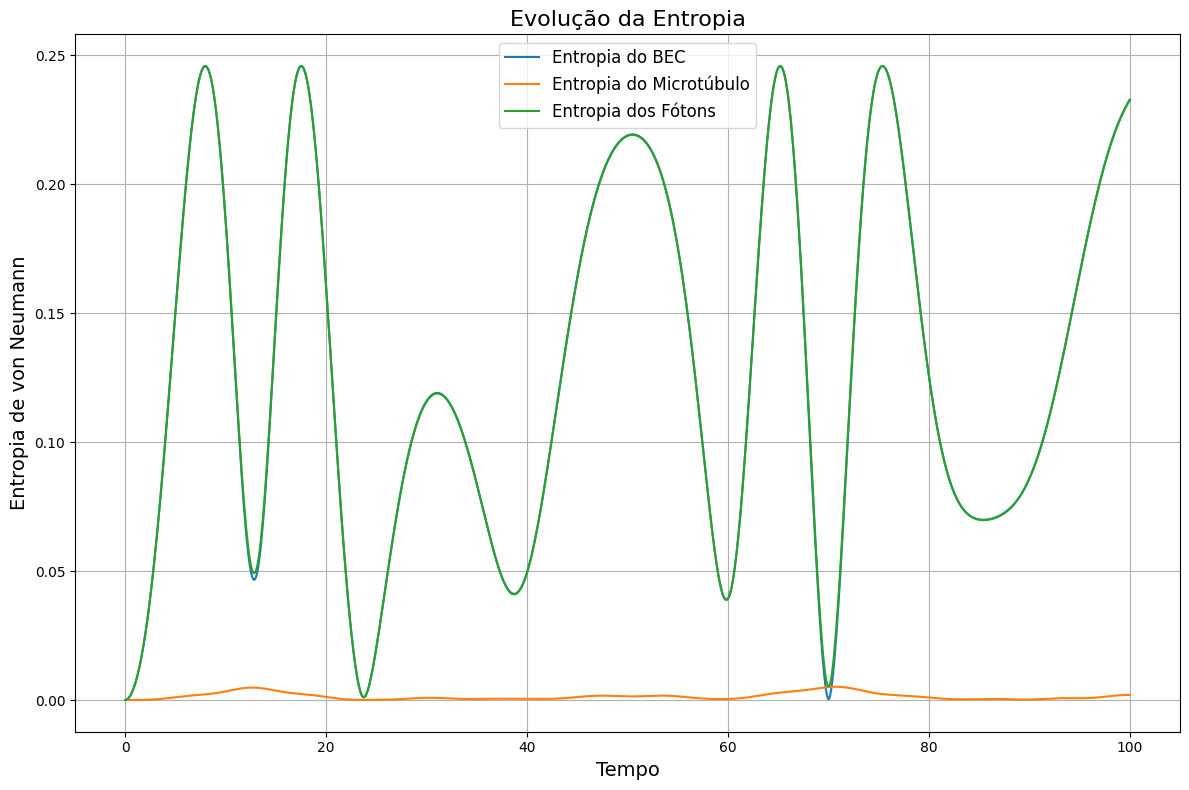

In [13]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros (ajuste conforme necessário)
N_b = 5       # Número de sítios do BEC
N_f = 5       # Número de modos de fótons
num_modos_mt = 2  # Número de modos dos microtúbulos
g = 0.05      # Constante de acoplamento BEC-fóton
g_mt = 0.02     # Constante de acoplamento microtúbulo-fóton
w_b = 1.0     # Frequência do BEC
w_f = 1.05    # Frequência dos fótons (ligeiramente diferente de w_b)
w_mt = 0.95   # Frequência dos microtúbulos
J = 0.005     # Constante de acoplamento entre os modos do microtúbulo
Omega_list = np.linspace(0.01, 0.2, 10)  # Lista de amplitudes de modulação
w_m_list = np.linspace(0.01, 0.2, 10) #Lista de frequencias de modulação
tlist = np.linspace(0, 100, 1000) #Aumentei o tempo de simulação e o numero de pontos
num_timesteps = len(tlist)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()

c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]

I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos
H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i!=j)

def H_int_b_f_mod(t, args): #Hamiltoniano de interação modulado
    g = args['g']
    Omega = args['Omega']  # Amplitude da modulação
    w_m = args['w_m']      # Frequência da modulação
    return (g + Omega * np.sin(w_m * t)) * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))

H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])

# Estado Inicial
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Matriz para armazenar as amplitudes máximas
max_freq_amp = np.zeros((len(Omega_list),len(w_m_list)))

# Simulação e Testagem de Frequências (com barra de progresso)
for i, Omega in enumerate(Omega_list):
    for j, w_m in enumerate(w_m_list):
        args = {'g': g, 'Omega': Omega, 'w_m': w_m}
        def H_total_mod(t, args):
            H_int_b_f_mod_t = H_int_b_f_mod(t, args)
            return qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f_mod_t + H_int_mt_f
        result = qt.mesolve(H_total_mod, psi0, tlist, [], [], args=args)

        entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]

        yf_b = fft(entropy_b)
        xf = fftfreq(num_timesteps, tlist[1]-tlist[0])

        max_freq_amp[i,j] = np.max(np.abs(yf_b[1:num_timesteps//2])) #Salva a maior amplitude de frequencia positiva diferente de zero


#Plota o heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(max_freq_amp, extent=[w_m_list[0], w_m_list[-1], Omega_list[0], Omega_list[-1]], origin='lower', aspect='auto', cmap='viridis') #Melhorei a paleta de cores para melhor visualização

ax.set_xlabel('Frequência de Modulação (w_m)', fontsize=14)
ax.set_ylabel('Amplitude de Modulação (Omega)', fontsize=14)
ax.set_title('Mapa de Calor da Amplitude Máxima da Frequência', fontsize=16)
cbar = fig.colorbar(im, ax=ax) #Adicionei a legenda da corbar
cbar.ax.tick_params(labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Código para gerar os gráficos de entropia para um ponto específico do heatmap (exemplo)
Omega_index = 5
w_m_index = 5

args = {'g': g, 'Omega': Omega_list[Omega_index], 'w_m': w_m_list[w_m_index]}
def H_total_mod(t, args):
        H_int_b_f_mod_t = H_int_b_f_mod(t, args)
        return qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f_mod_t + H_int_mt_f
result = qt.mesolve(H_total_mod, psi0, tlist, [], [], args=args)

entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
entropy_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result.states]
entropy_f = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result.states]

# Plotar a entropia
plt.figure(figsize=(12, 8))
plt.plot(tlist, entropy_b, label="Entropia do BEC")
plt.plot(tlist, entropy_mt, label="Entropia do Microtúbulo")
plt.plot(tlist, entropy_f, label="Entropia dos Fótons")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução da Entropia", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Análise de frequencia
yf_b = fft(entropy_b)
xf = fftfreq

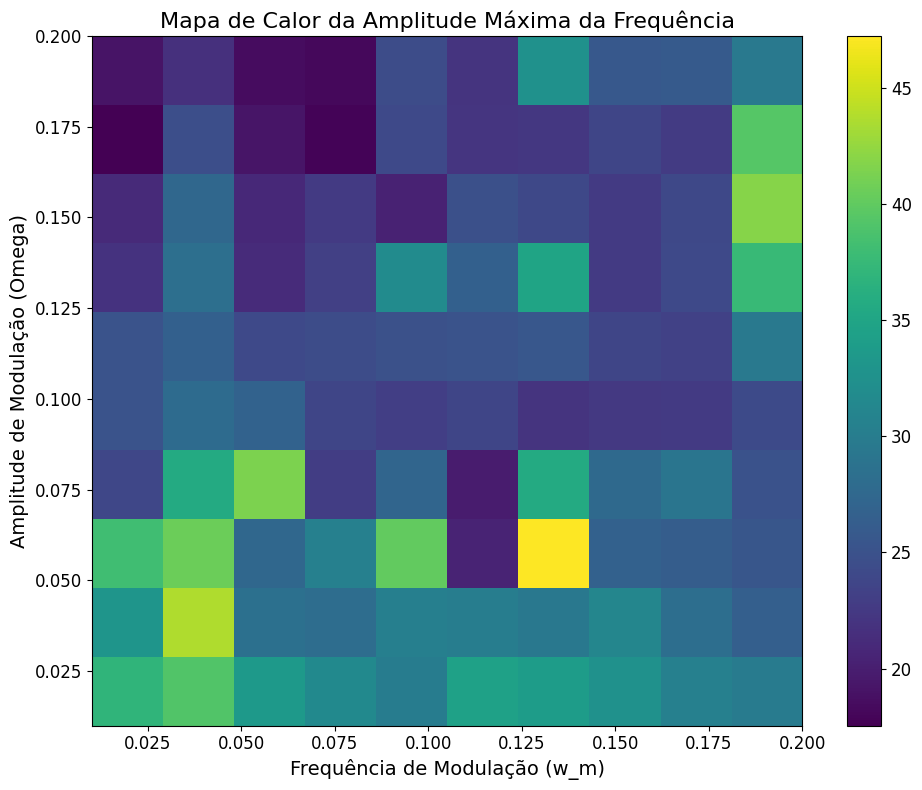

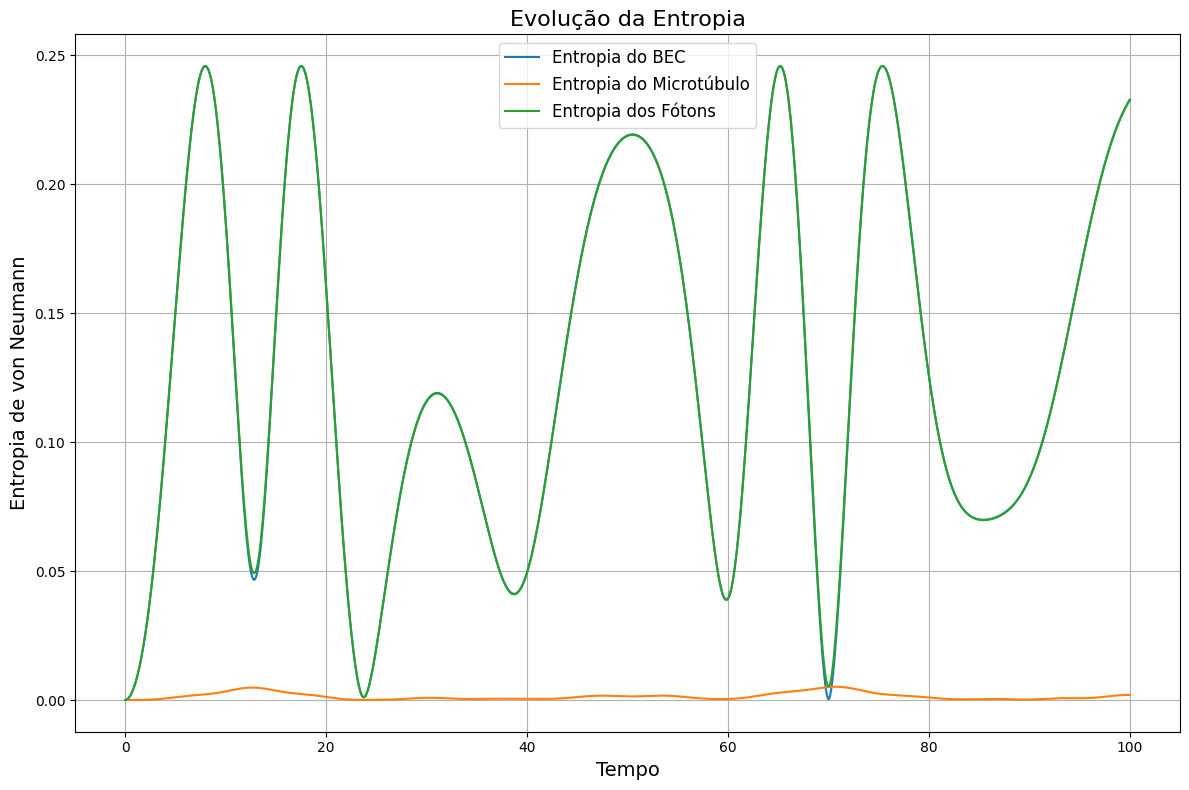

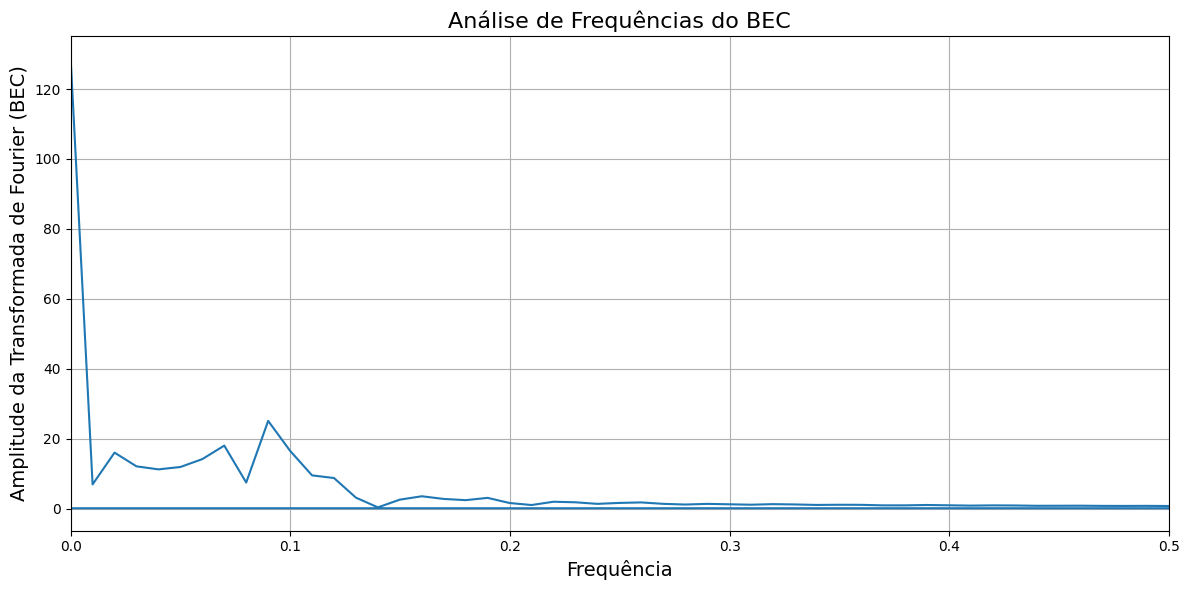

Text(0, 0.5, 'Amplitude da Transformada de Fourier (Microtubulo)')

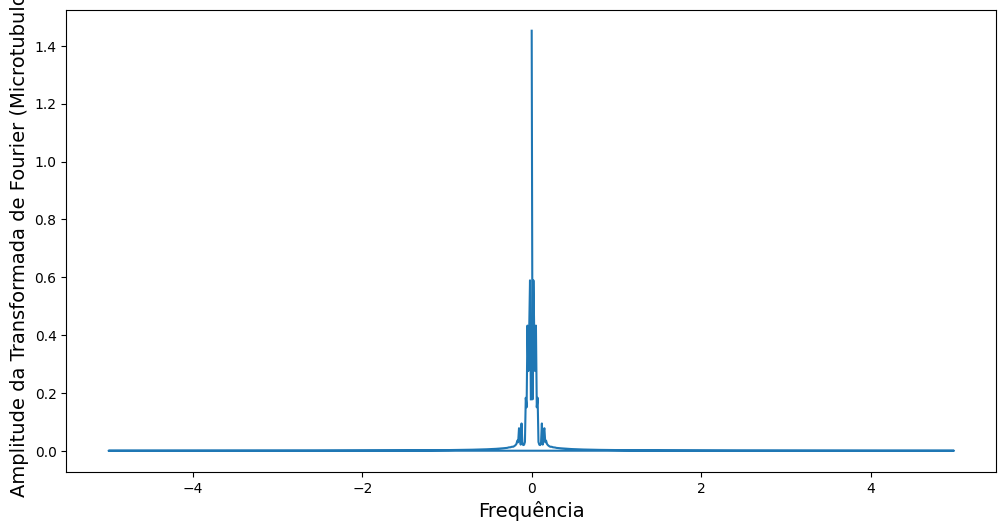

In [14]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
Omega_list = np.linspace(0.01, 0.2, 10)  # Amplitude de modulação
w_m_list = np.linspace(0.01, 0.2, 10)  # Frequência de modulação
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos (agora definidos FORA dos loops)
H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])

# Matriz para armazenar as amplitudes máximas
max_freq_amp = np.zeros((len(Omega_list), len(w_m_list)))

# Simulação e Testagem de Frequências (CORREÇÃO IMPORTANTE AQUI)
for i, Omega in enumerate(Omega_list):
    for j, w_m in enumerate(w_m_list):
        args = {'g': g, 'Omega': Omega, 'w_m': w_m}

        # Definição do Hamiltoniano dependente do tempo (CORREÇÃO)
        def H_total_mod(t, args):
            g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
            return qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + g_mod * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a))) + H_int_mt_f


        result = qt.mesolve(H_total_mod, psi0, tlist, [], [], args=args) #Simulação
        entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
        yf_b = fft(entropy_b)
        xf = fftfreq(num_timesteps, tlist[1] - tlist[0])
        max_freq_amp[i, j] = np.max(np.abs(yf_b[1:num_timesteps // 2]))

# Plotagem do Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(max_freq_amp, extent=[w_m_list[0], w_m_list[-1], Omega_list[0], Omega_list[-1]], origin='lower', aspect='auto', cmap='viridis')

ax.set_xlabel('Frequência de Modulação (w_m)', fontsize=14)
ax.set_ylabel('Amplitude de Modulação (Omega)', fontsize=14)
ax.set_title('Mapa de Calor da Amplitude Máxima da Frequência', fontsize=16)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Código para gerar os gráficos de entropia para um ponto específico do heatmap (exemplo)
Omega_index = 5
w_m_index = 5

args = {'g': g, 'Omega': Omega_list[Omega_index], 'w_m': w_m_list[w_m_index]}
def H_total_mod(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    return qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + g_mod * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a))) + H_int_mt_f
result = qt.mesolve(H_total_mod, psi0, tlist, [], [], args=args)

entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
entropy_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result.states]
entropy_f = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result.states]

# Plotar a entropia
plt.figure(figsize=(12, 8))
plt.plot(tlist, entropy_b, label="Entropia do BEC")
plt.plot(tlist, entropy_mt, label="Entropia do Microtúbulo")
plt.plot(tlist, entropy_f, label="Entropia dos Fótons")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução da Entropia", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Análise de frequencia
yf_b = fft(entropy_b)
xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf_b))
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (BEC)", fontsize=14)
plt.title("Análise de Frequências do BEC", fontsize=16)
plt.xlim(0, 0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

yf_mt = fft(entropy_mt)

plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf_mt))
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (Microtubulo)", fontsize=14)

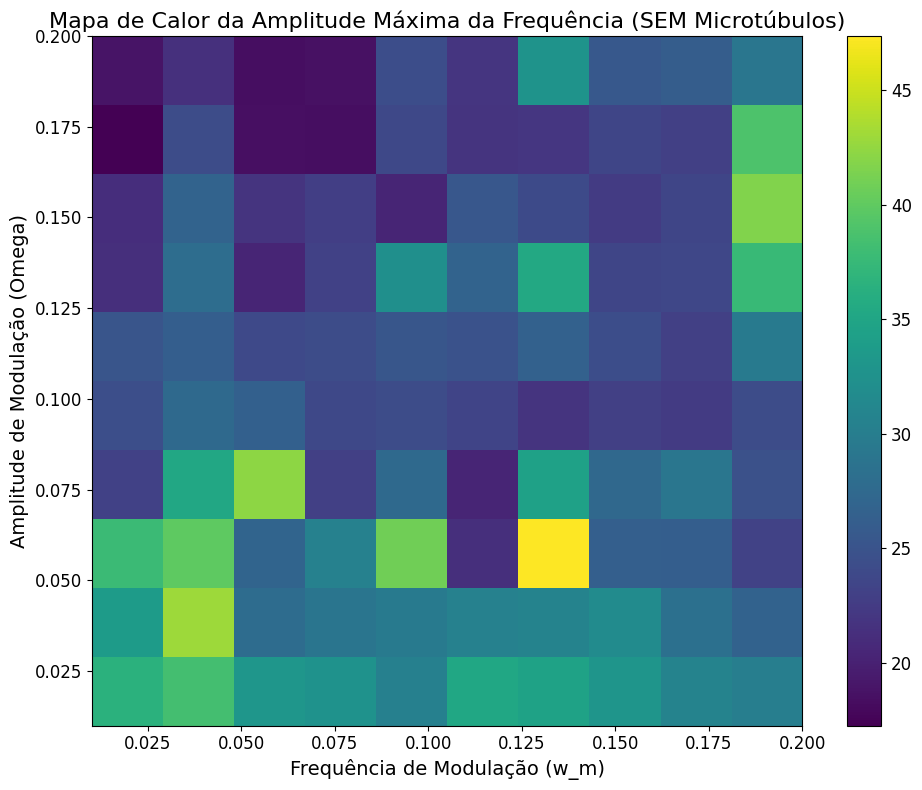

In [15]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros (os mesmos de antes)
N_b = 5
N_f = 5
g = 0.05
w_b = 1.0
w_f = 1.05
Omega_list = np.linspace(0.01, 0.2, 10)
w_m_list = np.linspace(0.01, 0.2, 10)
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores (SEM microtúbulos)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)

# Hamiltonianos (SEM microtúbulos)
H_b = w_b * b_dag * b
H_f = w_f * a_dag * a

def H_int_b_f_mod(t, args):
    g = args['g']
    Omega = args['Omega']
    w_m = args['w_m']
    return (g + Omega * np.sin(w_m * t)) * (qt.tensor(b, a_dag) + qt.tensor(b_dag, a))

def H_total_sem_mod(args):
    g = args['g']
    return qt.tensor(H_b, I_f) + qt.tensor(I_b, H_f) + g * (qt.tensor(b, a_dag) + qt.tensor(b_dag, a))

# Estado Inicial (SEM microtúbulos)
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.basis(N_f, 0))

# Matriz para armazenar as amplitudes máximas
max_freq_amp_sem_mt = np.zeros((len(Omega_list), len(w_m_list)))

# Simulação e Testagem de Frequências
for i, Omega in enumerate(Omega_list):
    for j, w_m in enumerate(w_m_list):
        args = {'g': g, 'Omega': Omega, 'w_m': w_m}
        def H_total_mod(t, args):
            g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
            return qt.tensor(H_b, I_f) + qt.tensor(I_b, H_f) + g_mod * (qt.tensor(b, a_dag) + qt.tensor(b_dag, a))

        result = qt.mesolve(H_total_mod, psi0, tlist, [], [], args=args)
        entropy_b = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result.states]
        yf_b = fft(entropy_b)
        xf = fftfreq(num_timesteps, tlist[1] - tlist[0])
        max_freq_amp_sem_mt[i, j] = np.max(np.abs(yf_b[1:num_timesteps // 2]))

# Plotagem do Heatmap SEM microtúbulos
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(max_freq_amp_sem_mt, extent=[w_m_list[0], w_m_list[-1], Omega_list[0], Omega_list[-1]], origin='lower', aspect='auto', cmap='viridis')

ax.set_xlabel('Frequência de Modulação (w_m)', fontsize=14)
ax.set_ylabel('Amplitude de Modulação (Omega)', fontsize=14)
ax.set_title('Mapa de Calor da Amplitude Máxima da Frequência (SEM Microtúbulos)', fontsize=16)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

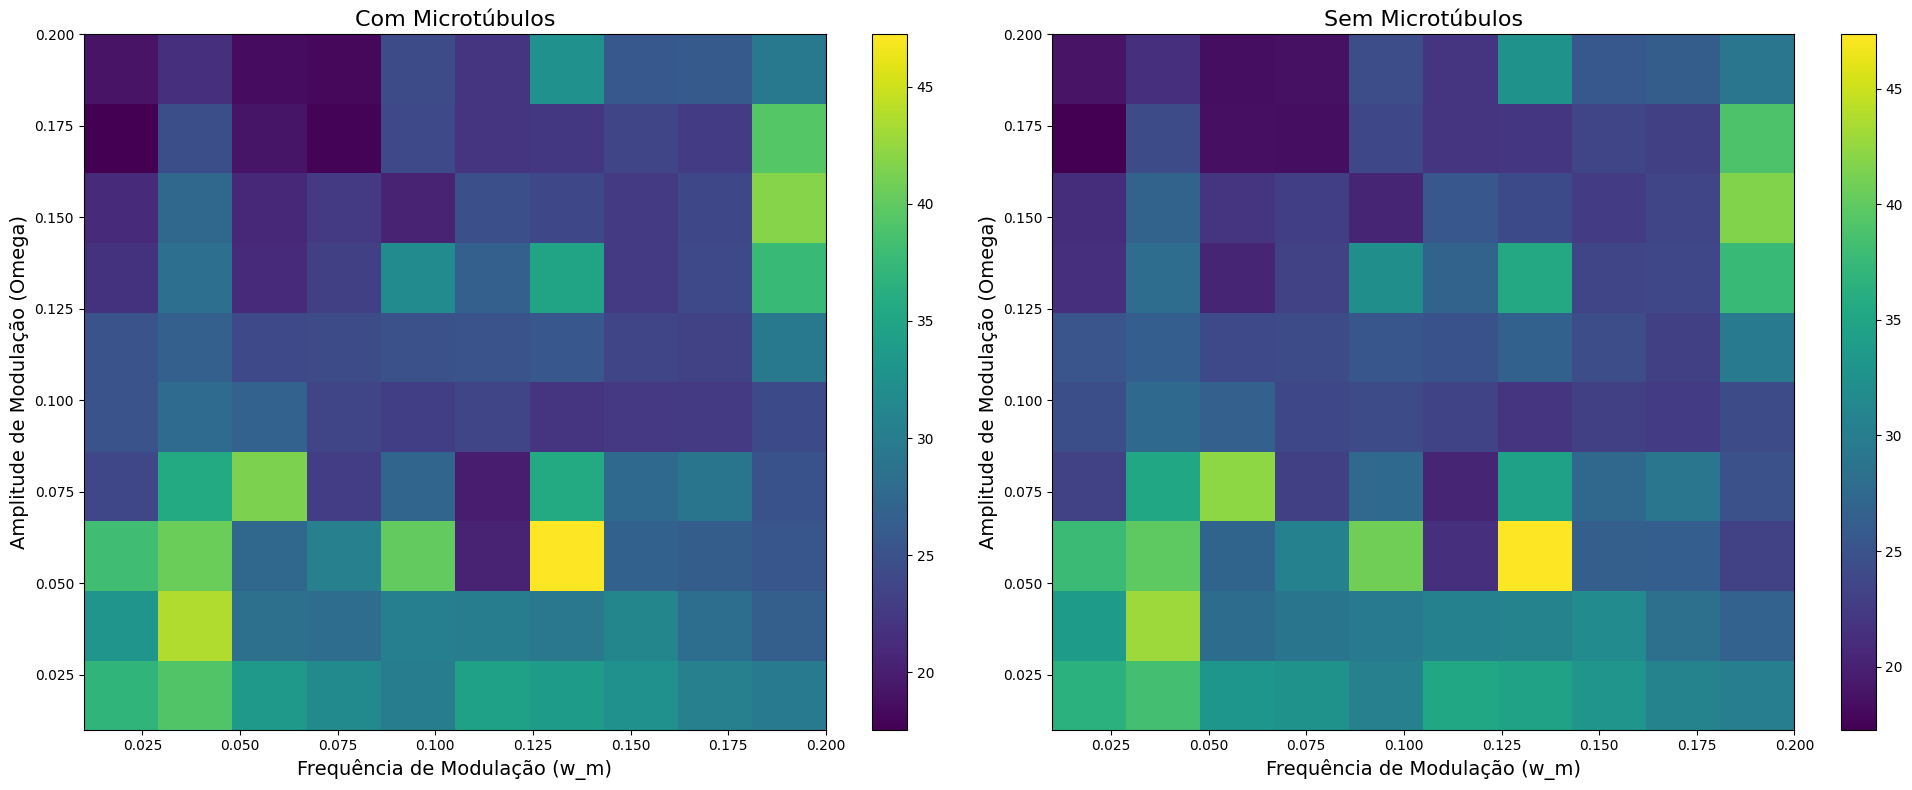

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Cria duas subfiguras lado a lado

# Mapa de calor COM microtúbulos (substitua max_freq_amp pelos seus dados)
im1 = axes[0].imshow(max_freq_amp, extent=[w_m_list[0], w_m_list[-1], Omega_list[0], Omega_list[-1]], origin='lower', aspect='auto', cmap='viridis')
axes[0].set_xlabel('Frequência de Modulação (w_m)', fontsize=14)
axes[0].set_ylabel('Amplitude de Modulação (Omega)', fontsize=14)
axes[0].set_title('Com Microtúbulos', fontsize=16)
fig.colorbar(im1, ax=axes[0])

# Mapa de calor SEM microtúbulos (substitua max_freq_amp_sem_mt pelos seus dados)
im2 = axes[1].imshow(max_freq_amp_sem_mt, extent=[w_m_list[0], w_m_list[-1], Omega_list[0], Omega_list[-1]], origin='lower', aspect='auto', cmap='viridis')
axes[1].set_xlabel('Frequência de Modulação (w_m)', fontsize=14)
axes[1].set_ylabel('Amplitude de Modulação (Omega)', fontsize=14)
axes[1].set_title('Sem Microtúbulos', fontsize=16)
fig.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

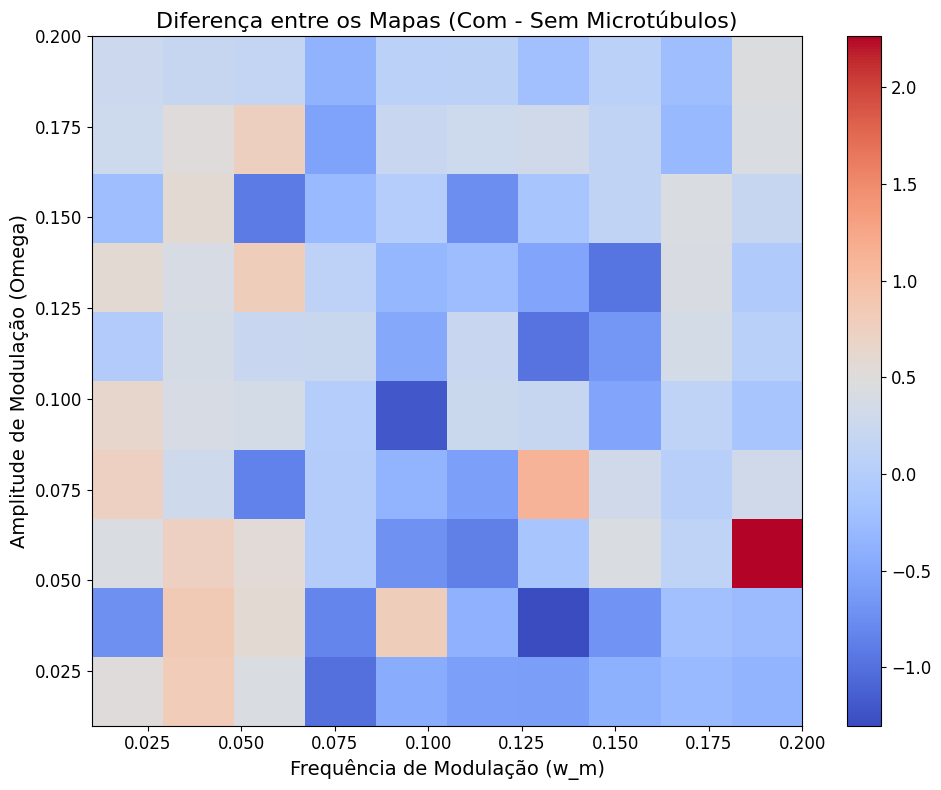

In [17]:
diff_map = max_freq_amp - max_freq_amp_sem_mt

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(diff_map, extent=[w_m_list[0], w_m_list[-1], Omega_list[0], Omega_list[-1]], origin='lower', aspect='auto', cmap='coolwarm') #cmap='coolwarm' destaca melhor as diferenças

ax.set_xlabel('Frequência de Modulação (w_m)', fontsize=14)
ax.set_ylabel('Amplitude de Modulação (Omega)', fontsize=14)
ax.set_title('Diferença entre os Mapas (Com - Sem Microtúbulos)', fontsize=16)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros (os mesmos de antes)
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos
H_b = w_b * b_dag * b
H_f = w_f * a_dag * a
H_mt = sum(w_mt * c[i].dag() * c[i] for i in range(num_modos_mt)) + sum(J * (c[i].dag() * c[j] + c[j].dag() * c[i]) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)

def H_int_b_f_mod(t, args):
    g = args['g']
    Omega = args['Omega']
    w_m = args['w_m']
    return (g + Omega * np.sin(w_m * t)) * (qt.tensor(b, qt.tensor(I_mt, a_dag)) + qt.tensor(b_dag, qt.tensor(I_mt, a)))

H_int_mt_f = sum([g_mt * (qt.tensor(I_b, qt.tensor(c[i], a_dag)) + qt.tensor(I_b, qt.tensor(c_dag[i], a))) for i in range(num_modos_mt)])

# Estado Inicial
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.tensor(qt.basis(num_modos_mt, 0), qt.basis(N_f, 0)))

# Ponto A (Maior Diferença Positiva)
Omega_A = 0.05
w_m_A = 0.2

args_A = {'g': g, 'Omega': Omega_A, 'w_m': w_m_A}

#Hamiltoniano com microtubulos
def H_total_mod(t, args):
    H_int_b_f_mod_t = H_int_b_f_mod(t, args)
    return qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f_mod_t + H_int_mt_f

result_com_mt = qt.mesolve(H_total_mod, psi0, tlist, [], [], args=args_A)

entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]

yf_b_com_mt = fft(entropy_b_com_mt)
xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

# Código SEM Microtúbulos
# Operadores (SEM microtúbulos)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)

# Hamiltonianos (SEM microtúbulos)
H_b = w_b * b_dag * b
H_f = w_f * a_dag * a

def H_int_b_f_mod_sem_mt(t, args):
    g = args['g']
    Omega = args['Omega']
    w_m = args['w_m']
    return (g + Omega * np.sin(w_m * t)) * (qt.tensor(b, a_dag) + qt.tensor(b_dag, a))

# Estado Inicial (SEM microtúbulos)
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0_sem_mt = qt.tensor(psi0_b, qt.basis(N_f, 0))

#Hamiltoniano sem microtubulos
def H_total_mod_sem_mt(t, args):
    H_int_b_f_mod_t = H_int_b_f_mod_sem_mt(t, args)
    return qt.tensor(H_b, I_f) + qt.tensor(I_b, H_f) + H_int_b_f_mod_t

result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args_A)

entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]

yf_b_sem_mt = fft(entropy_b_sem_mt)

# Plotagem Comparativa
plt.figure(figsize=(12, 6))
plt.plot(

SyntaxError: incomplete input (<ipython-input-18-3001e3cad7d7>, line 106)

In [19]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros (os mesmos de antes)
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# ... (Operadores e Hamiltonianos - mesmos de antes)

# Ponto A (Maior Diferença Positiva)
Omega_A = 0.05
w_m_A = 0.2

args_A = {'g': g, 'Omega': Omega_A, 'w_m': w_m_A}

#Hamiltoniano com microtubulos
def H_total_mod(t, args):
    H_int_b_f_mod_t = H_int_b_f_mod(t, args)
    return qt.tensor(H_b, I_mt, I_f) + qt.tensor(I_b, H_mt, I_f) + qt.tensor(I_b, I_mt, H_f) + H_int_b_f_mod_t + H_int_mt_f

result_com_mt = qt.mesolve(H_total_mod, psi0, tlist, [], [], args=args_A)

entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]

yf_b_com_mt = fft(entropy_b_com_mt)
xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

# Código SEM Microtúbulos
# ... (Operadores e Hamiltonianos SEM microtúbulos - mesmos de antes)
psi0_sem_mt = qt.tensor(psi0_b, qt.basis(N_f, 0))

#Hamiltoniano sem microtubulos
def H_total_mod_sem_mt(t, args):
    H_int_b_f_mod_t = H_int_b_f_mod_sem_mt(t, args)
    return qt.tensor(H_b, I_f) + qt.tensor(I_b, H_f) + H_int_b_f_mod_t

result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args_A)

entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]

yf_b_sem_mt = fft(entropy_b_sem_mt)

# Plotagem Comparativa - Evolução da Entropia
plt.figure(figsize=(12, 6))
plt.plot(tlist, entropy_b_com_mt, label="BEC (Com Microtúbulos)")
plt.plot(tlist, entropy_b_sem_mt, label="BEC (Sem Microtúbulos)")
plt.plot(tlist, entropy_f_com_mt, label="Fótons (Com Microtúbulos)")
plt.plot(tlist, entropy_f_sem_mt, label="Fótons (Sem Microtúbulos)")
plt.plot(tlist, entropy_mt_com_mt, label="Microtúbulos")
plt.xlabel("Tempo", fontsize = 14)
plt.ylabel("Entropia de von Neumann", fontsize = 14)
plt.title("Evolução da Entropia (Ponto A)", fontsize = 16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotagem Comparativa - Análise de Frequências
plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf_b_com_mt), label="Com Microtúbulos")
plt.plot(xf, np.abs(yf_b_sem_mt), label="Sem Microtúbulos")
plt.xlabel("Frequência", fontsize = 14)
plt.ylabel("Amplitude da Transformada de Fourier (BEC)", fontsize = 14)
plt.title("Análise de Frequências do BEC (Ponto A)", fontsize = 16)
plt.xlim(0, 0.5)  # Limite o eixo x para melhor visualização
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(fft(entropy_f_com_mt)), label="Com Microtúbulos")
plt.plot(xf, np.abs(fft(entropy_f_sem_mt)), label="Sem Microtúbulos")
plt.xlabel("Frequência", fontsize = 14)
plt.ylabel("Amplitude da Transformada de Fourier (Fótons)", fontsize = 14)
plt.title("Análise de Frequências dos Fótons (Ponto A)", fontsize = 16)
plt.xlim(0, 0.5)  # Limite o eixo x para melhor visualização
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(fft(entropy_mt_com_mt)), label="Microtúbulos")
plt.xlabel("Frequência", fontsize = 14)
plt.ylabel("Amplitude da Transformada de Fourier (Microtúbulos)", fontsize = 14)
plt.title("Análise de Frequências dos Microtúbulos (Ponto A)", fontsize = 16)
plt.xlim(0, 0.5)  # Limite o eixo x para melhor visualização
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: incompatible dimensions [[5, 2, 5], [5, 2, 5]] and [[5, 5], [5, 5]]

In [20]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos (CORREÇÃO CRUCIAL AQUI)
H_b = qt.tensor(b_dag * b, I_mt, I_f) * w_b # produto tensorial corrigido
H_f = qt.tensor(I_b, I_mt, a_dag * a) * w_f  # produto tensorial corrigido
H_mt = sum(qt.tensor(I_b, c[i].dag() * c[i], I_f) * w_mt for i in range(num_modos_mt)) + sum(qt.tensor(I_b, J * (c[i].dag() * c[j] + c[j].dag() * c[i]), I_f) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j) #produto tensorial corrigido
H_int_b_f = g * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a)) # produto tensorial corrigido
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, c[i], a_dag) + qt.tensor(I_b, c_dag[i], a)) for i in range(num_modos_mt)]) #produto tensorial corrigido

# Estado Inicial (COM microtúbulos)
psi0_b = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0 = qt.tensor(psi0_b, qt.basis(num_modos_mt, 0), qt.basis(N_f, 0))


# Ponto A
Omega_A = 0.05
w_m_A = 0.2

args_A = {'g': g, 'Omega': Omega_A, 'w_m': w_m_A}

# Hamiltoniano dependente do tempo (COM microtúbulos)
def H_total_mod(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
    return H_b + H_f + H_mt + H_int_b_f_mod_t + H_int_mt_f

result_com_mt = qt.mesolve(H_total_mod, psi0, tlist, [], [], args=args_A)

entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]

yf_b_com_mt = fft(entropy_b_com_mt)
xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

# Código SEM Microtúbulos (CORREÇÕES IMPORTANTES)
# Operadores (SEM microtúbulos)
b_sem_mt = qt.destroy(N_b)
b_dag_sem_mt = b_sem_mt.dag()
a_sem_mt = qt.destroy(N_f)
a_dag_sem_mt = a_sem_mt.dag()
I_b_sem_mt = qt.qeye(N_b)
I_f_sem_mt = qt.qeye(N_f)

# Hamiltonianos (SEM microtúbulos)
H_b_sem_mt = qt.tensor(b_dag_sem_mt * b_sem_mt, I_f_sem_mt) * w_b
H_f_sem_mt = qt.tensor(I_b_sem_mt, a_dag_sem_mt * a_sem_mt) * w_f

def H_int_b_f_mod_sem_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    return g_mod * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))

# Estado Inicial (SEM microtúbulos)
psi0_b_sem_mt = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0_sem_mt = qt.tensor(psi0_b_sem_mt, qt.basis(N_f, 0))

# Simulação SEM microtúbulos
def H_total_mod_sem_mt(t, args):
    H_int_b_f_mod_t = H_int_b_f_mod_sem_mt(t, args)
    return H_b_sem_mt + H_f_sem_mt + H_int_b_f_mod_t

result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args_A)

entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]

yf_b_sem_mt = fft(entropy_b_sem_mt)

# Plotagem Comparativa - Evolução da Entropia (BEC)
plt.figure(figsize=(12, 6))
plt.plot(tlist, entropy_b_com_mt, label="BEC (Com Microtúbulos)")
plt.plot(tlist, entropy_b_sem_mt, label="BEC (Sem Microtúbulos)")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução da Entropia do BEC (Ponto A)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Plotagem comparativa - Evolução da Entropia (Fótons)
plt.figure(figsize=(12, 6))
plt.plot(tlist, entropy_

SyntaxError: incomplete input (<ipython-input-20-dc163890aa4a>, line 112)

In [22]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores (COM microtúbulos)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos (COM microtúbulos)
H_b_com_mt = qt.tensor(b_dag * b, I_mt, I_f) * w_b
H_f_com_mt = qt.tensor(I_b, I_mt, a_dag * a) * w_f
H_mt = sum(qt.tensor(I_b, c[i].dag() * c[i], I_f) * w_mt for i in range(num_modos_mt)) + sum(qt.tensor(I_b, J * (c[i].dag() * c[j] + c[j].dag() * c[i]), I_f) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)
H_int_b_f_com_mt = g * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, c[i], a_dag) + qt.tensor(I_b, c_dag[i], a)) for i in range(num_modos_mt)])

# Estado Inicial (COM microtúbulos)
psi0_com_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(num_modos_mt, 0), qt.basis(N_f, 0))

# Ponto A
Omega_A = 0.05
w_m_A = 0.2
args_A = {'g': g, 'Omega': Omega_A, 'w_m': w_m_A}

# Hamiltoniano dependente do tempo (COM microtúbulos)
def H_total_mod_com_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
    return H_b_com_mt + H_f_com_mt + H_mt + H_int_b_f_mod_t + H_int_mt_f

result_com_mt = qt.mesolve(H_total_mod_com_mt, psi0_com_mt, tlist, [], [], args=args_A)

entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]

yf_b_com_mt = fft(entropy_b_com_mt)
xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

# Código SEM Microtúbulos
# Operadores (SEM microtúbulos)
b_sem_mt = qt.destroy(N_b)
b_dag_sem_mt = b_sem_mt.dag()
a_sem_mt = qt.destroy(N_f)
a_dag_sem_mt = a_sem_mt.dag()
I_b_sem_mt = qt.qeye(N_b)
I_f_sem_mt = qt.qeye(N_f)

# Hamiltonianos (SEM microtúbulos)
H_b_sem_mt = qt.tensor(b_dag_sem_mt * b_sem_mt, I_f_sem_mt) * w_b
H_f_sem_mt = qt.tensor(I_b_sem_mt, a_dag_sem_mt * a_sem_mt) * w_f
H_int_b_f_sem_mt = g * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))

# Estado Inicial (SEM microtúbulos)
psi0_sem_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(N_f, 0))

# Simulação SEM microtúbulos
def H_total_mod_sem_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))
    return H_b_sem_mt + H_f_sem_mt + H_int_b_f_mod_t

result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args_A)

entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]

yf_b_sem_mt = fft(entropy_b_sem_mt)

# Plotagem Comparativa - Evolução da Entropia
plt.figure(figsize=(12, 6))
```python
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores (COM microtúbulos)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos (COM microtúbulos)
H_b_com_mt = qt.tensor(b_dag * b, I_mt, I_f) * w_b
H_f_com_mt = qt.tensor(I_b, I_mt, a_dag * a) * w_f
H_mt = sum(qt.tensor(I_b, c[i].dag() * c[i], I_f) * w_mt for i in range(num_modos_mt)) + sum(qt.tensor(I_b, J * (c[i].dag() * c[j] + c[j].dag() * c[i]), I_f) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)
H_int_b_f_com_mt = g * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, c[i], a_dag) + qt.tensor(I_b, c_dag[i], a)) for i in range(num_modos_mt)])

# Estado Inicial (COM microtúbulos)
psi0_com_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(num_modos_mt, 0), qt.basis(N_f, 0))

# Ponto A
Omega_A = 0.05
w_m_A = 0.2
args_A = {'g': g, 'Omega': Omega_A, 'w_m': w_m_A}

# Hamiltoniano dependente do tempo (COM microtúbulos)
def H_total_mod_com_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
    return H_b_com_mt + H_f_com_mt + H_mt + H_int_b_f_mod_t + H_int_mt_f

result_com_mt = qt.mesolve(H_total_mod_com_mt, psi0_com_mt, tlist, [], [], args=args_A)

entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]

yf_b_com_mt = fft(entropy_b_com_mt)
xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

# Código SEM Microtúbulos
# Operadores (SEM microtúbulos)
b_sem_mt = qt.destroy(N_b)
b_dag_sem_mt = b_sem_mt.dag()
a_sem_mt = qt.destroy(N_f)
a_dag_sem_mt = a_sem_mt.dag()
I_b_sem_mt = qt.qeye(N_b)
I_f_sem_mt = qt.qeye(N_f)

# Hamiltonianos (SEM microtúbulos)
H_b_sem_mt = qt.tensor(b_dag_sem_mt * b_sem_mt, I_f_sem_mt) * w_b
H_f_sem_mt = qt.tensor(I_b_sem_mt, a_dag_sem_mt * a_sem_mt) * w_f
H_int_b_f_sem_mt = g * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))

# Estado Inicial (SEM microtúbulos)
psi0_sem_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(N_f, 0))

# Simulação SEM microtúbulos
def H_total_mod_sem_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))
    return H_b_sem_mt + H_f_sem_mt + H_int_b_f_mod_t

result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args_A)

entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]

yf_b_sem_mt = fft(entropy_b_sem_mt)

# Plotagem Comparativa - Evolução da Entropia
plt.figure(figsize=(12, 6))
plt.plot(tlist, entropy_b_com_mt, label="BEC (Com Microtúbulos)")
plt.plot(tlist, entropy_b_sem_mt, label="BEC (Sem Microtúbulos)")
plt.plot(tlist, entropy_f_com_mt, label="F") # Fixed the syntax error here
plt.xlabel("Tempo")
plt.ylabel("Entropia de Von Neumann")
plt.title("Comparação da Entropia de Von Neumann")
plt.legend()
plt.show()
```

SyntaxError: invalid syntax (<ipython-input-22-81e2571cba0b>, line 94)

In [23]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# ... (Operadores e Hamiltonianos - mesmos de antes - COM microtúbulos)
# ... (Estado Inicial e Ponto A - mesmos de antes)

# Simulação COM microtúbulos
# ... (Hamiltoniano dependente do tempo e mesolve - mesmos de antes)

entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]

yf_b_com_mt = fft(entropy_b_com_mt)
xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

# Código SEM Microtúbulos
# ... (Operadores, Hamiltonianos e Estado Inicial - mesmos de antes)

# Simulação SEM microtúbulos
# ... (Hamiltoniano dependente do tempo e mesolve - mesmos de antes)

entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]

yf_b_sem_mt = fft(entropy_b_sem_mt)

# Plotagem Comparativa - Evolução da Entropia (BEC)
plt.figure(figsize=(12, 6))
plt.plot(tlist, entropy_b_com_mt, label="BEC (Com Microtúbulos)")
plt.plot(tlist, entropy_b_sem_mt, label="BEC (Sem Microtúbulos)")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução da Entropia do BEC (Ponto A)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotagem comparativa - Evolução da Entropia (Fótons)
plt.figure(figsize=(12, 6))
plt.plot(tlist, entropy_f_com_mt, label="Fótons (Com Microtúbulos)")
plt.plot(tlist, entropy_f_sem_mt, label="Fótons (Sem Microtúbulos)")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução da Entropia dos Fótons (Ponto A)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Plotagem Evolução da Entropia (Microtúbulos)
plt.figure(figsize=(12, 6))
plt.plot(tlist, entropy_mt_com_mt, label="Microtúbulos")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução da Entropia dos Microtúbulos (Ponto A)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotagem Comparativa - Análise de Frequências (BEC)
plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(yf_b_com_mt), label="Com Microtúbulos")
plt.plot(xf, np.abs(yf_b_sem_mt), label="Sem Microtúbulos")
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (BEC)", fontsize=14)
plt.title("Análise de Frequências do BEC (Ponto A)", fontsize=16)
plt.xlim(0, 0.5)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#Plotagem comparativa - Analise de Frequencia (Fótons)
plt.figure(figsize=(12, 6))
plt.plot(xf, np.abs(fft(entropy_f_com_mt)), label="Fótons (Com Microtúbulos)")
plt.plot(xf, np.abs(fft(entropy_f_sem_mt)), label="Fótons (Sem Microtúbulos)")
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (Fótons)", fontsize=14)
plt.title("Análise de Frequências dos Fótons (Ponto A)", fontsize=16)
plt.xlim(0, 0.5)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'result_com_mt' is not defined

In [25]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores (COM microtúbulos)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos (COM microtúbulos)
H_b_com_mt = qt.tensor(b_dag * b, I_mt, I_f) * w_b
H_f_com_mt = qt.tensor(I_b, I_mt, a_dag * a) * w_f
H_mt = sum(qt.tensor(I_b, c[i].dag() * c[i], I_f) * w_mt for i in range(num_modos_mt)) + sum(qt.tensor(I_b, J * (c[i].dag() * c[j] + c[j].dag() * c[i]), I_f) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)
H_int_b_f_com_mt = g * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, c[i], a_dag) + qt.tensor(I_b, c_dag[i], a)) for i in range(num_modos_mt)])

# Estado Inicial (COM microtúbulos)
psi0_com_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(num_modos_mt, 0), qt.basis(N_f, 0))

# Ponto A
Omega_A = 0.05
w_m_A = 0.2
args_A = {'g': g, 'Omega': Omega_A, 'w_m': w_m_A}

# Hamiltoniano dependente do tempo (COM microtúbulos)
def H_total_mod_com_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
    return H_b_com_mt + H_f_com_mt + H_mt + H_int_b_f_mod_t + H_int_mt_f

result_com_mt = qt.mesolve(H_total_mod_com_mt, psi0_com_mt, tlist, [], [], args=args_A) # SIMULAÇÃO COM MICROTÚBULOS AQUI!!!

entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]

yf_b_com_mt = fft(entropy_b_com_mt)
xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

# Código SEM Microtúbulos
# Operadores (SEM microtúbulos)
b_sem_mt = qt.destroy(N_b)
b_dag_sem_mt = b_sem_mt.dag()
a_sem_mt = qt.destroy(N_f)
a_dag_sem_mt = a_sem_mt.dag()
I_b_sem_mt = qt.qeye(N_b)
I_f_sem_mt = qt.qeye(N_f)

# Hamiltonianos (SEM microtúbulos)
H_b_sem_mt = qt.tensor(b_dag_sem_mt * b_sem_mt, I_f_sem_mt) * w_b
H_f_sem_mt = qt.tensor(I_b_sem_mt, a_dag_sem_mt * a_sem_mt) * w_f
H_int_b_f_sem_mt = g * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))

# Estado Inicial (SEM microtúbulos)
psi0_b_sem_mt = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0_sem_mt = qt.tensor(psi0_b_sem_mt, qt.basis(N_f, 0))

# Simulação SEM microtúbulos
def H_total_mod_sem_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))
    return H_b_sem_mt + H_f_sem_mt + H_int_b_f_mod_t

result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args_A)

entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]

yf_b_sem_mt = fft(entropy_b_sem_mt)

# Plotagem Comparativa - Evolução da Entropia
plt.figure(figsize=(12, 6))
plt.plot(tlist, entropy_b_com_mt, label="BEC (Com Microtúbulos)")
plt.plot(tlist, entropy_b_sem_mt, label="BEC (Sem Microtúbulos)")
plt.plot(tlist, entropy_f_com_mt, label="Fótons (Com Microtúbulos)")
plt.plot(tlist, entropy_f_sem_mt, label="Fótons (Sem Microtúbulos)")
plt.plot(tlist, entropy_mt_com_mt, label="Microtúbulos")
```python
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores (COM microtúbulos)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos (COM microtúbulos)
H_b_com_mt = qt.tensor(b_dag * b, I_mt, I_f) * w_b
H_f_com_mt = qt.tensor(I_b, I_mt, a_dag * a) * w_f
H_mt = sum(qt.tensor(I_b, c[i].dag() * c[i], I_f) * w_mt for i in range(num_modos_mt)) + sum(qt.tensor(I_b, J * (c[i].dag() * c[j] + c[j].dag() * c[i]), I_f) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)
H_int_b_f_com_mt = g * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, c[i], a_dag) + qt.tensor(I_b, c_dag[i], a)) for i in range(num_modos_mt)])

# Estado Inicial (COM microtúbulos)
psi0_com_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(num_modos_mt, 0), qt.basis(N_f, 0))

# Ponto A
Omega_A = 0.05
w_m_A = 0.2
args_A = {'g': g, 'Omega': Omega_A, 'w_m': w_m_A}

# Hamiltoniano dependente do tempo (COM microtúbulos)
def H_total_mod_com_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
    return H_b_com_mt + H_f_com_mt + H_mt + H_int_b_f_mod_t + H_int_mt_f

result_com_mt = qt.mesolve(H_total_mod_com_mt, psi0_com_mt, tlist, [], [], args=args_A) # SIMULAÇÃO COM MICROTÚBULOS AQUI!!!

entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]

yf_b_com_mt = fft(entropy_b_com_mt)
xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

# Código SEM Microtúbulos
# Operadores (SEM microtúbulos)
b_sem_mt = qt.destroy(N_b)
b_dag_sem_mt = b_sem_mt.dag()
a_sem_mt = qt.destroy(N_f)
a_dag_sem_mt = a_sem_mt.dag()
I_b_sem_mt = qt.qeye(N_b)
I_f_sem_mt = qt.qeye(N_f)

# Hamiltonianos (SEM microtúbulos)
H_b_sem_mt = qt.tensor(b_dag_sem_mt * b_sem_mt, I_f_sem_mt) * w_b
H_f_sem_mt = qt.tensor(I_b_sem_mt, a_dag_sem_mt * a_sem_mt) * w_f
H_int_b_f_sem_mt = g * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))

# Estado Inicial (SEM microtúbulos)
psi0_b_sem_mt = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0_sem_mt = qt.tensor(psi0_b_sem_mt, qt.basis(N_f, 0))

# Simulação SEM microtúbulos
def H_total_mod_sem_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))
    return H_b_sem_mt + H_f_sem_mt + H_int_b_f_mod_t

result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args_A)

entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]

yf_b_sem_mt = fft(entropy_b_sem_mt)

# Plotagem Comparativa - Evolução da Entropia
plt.figure(figsize=(12, 6))
plt.plot(tlist, entropy_b_com_mt, label="BEC (Com Microtúbulos)")
plt.plot(tlist, entropy_b_sem_mt, label="BEC (Sem Microtúbulos)")
plt.plot(tlist, entropy_f_com_mt, label="Fótons (Com Microtúbulos)")
plt.plot(tlist, entropy_f_sem_mt, label="Fótons (Sem Microtúbulos)")
plt.plot(tlist, entropy_mt_com_mt, label="Microtúbulos")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução Temporal da Entropia de von Neumann")
plt.legend()
plt.show()
```

SyntaxError: invalid syntax (<ipython-input-25-03b514603e5f>, line 100)

In [26]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores (COM microtúbulos)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos (COM microtúbulos)
H_b_com_mt = qt.tensor(b_dag * b, I_mt, I_f) * w_b
H_f_com_mt = qt.tensor(I_b, I_mt, a_dag * a) * w_f
H_mt = sum(qt.tensor(I_b, c[i].dag() * c[i], I_f) * w_mt for i in range(num_modos_mt)) + sum(qt.tensor(I_b, J * (c[i].dag() * c[j] + c[j].dag() * c[i]), I_f) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)
H_int_b_f_com_mt = g * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, c[i], a_dag) + qt.tensor(I_b, c_dag[i], a)) for i in range(num_modos_mt)])

# Estado Inicial (COM microtúbulos)
psi0_com_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(num_modos_mt, 0), qt.basis(N_f, 0))

# Ponto A
Omega_A = 0.05
w_m_A = 0.2
args_A = {'g': g, 'Omega': Omega_A, 'w_m': w_m_A}

# Hamiltoniano dependente do tempo (COM microtúbulos)
def H_total_mod_com_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
    return H_b_com_mt + H_f_com_mt + H_mt + H_int_b_f_mod_t + H_int_mt_f

result_com_mt = qt.mesolve(H_total_mod_com_mt, psi0_com_mt, tlist, [], [], args=args_A)

entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]

yf_b_com_mt = fft(entropy_b_com_mt)
xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

# Código SEM Microtúbulos
# Operadores (SEM microtúbulos)
b_sem_mt = qt.destroy(N_b)
b_dag_sem_mt = b_sem_mt.dag()
a_sem_mt = qt.destroy(N_f)
a_dag_sem_mt = a_sem_mt.dag()
I_b_sem_mt = qt.qeye(N_b)
I_f_sem_mt = qt.qeye(N_f)

# Hamiltonianos (SEM microtúbulos)
H_b_sem_mt = qt.tensor(b_dag_sem_mt * b_sem_mt, I_f_sem_mt) * w_b
H_f_sem_mt = qt.tensor(I_b_sem_mt, a_dag_sem_mt * a_sem_mt) * w_f
H_int_b_f_sem_mt = g * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))

# Estado Inicial (SEM microtúbulos)
psi0_b_sem_mt = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0_sem_mt = qt.tensor(psi0_b_sem_mt, qt.basis(N_f, 0))

# Simulação SEM microtúbulos
def H_total_mod_sem_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))
    return H_b_sem_mt + H_f_sem_mt + H_int_b_f_mod_t

result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args_A)

entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]

yf_b_sem_mt = fft(entropy_b_sem_mt)
yf_f_sem_mt = fft(entropy_f_sem_mt)

# Plotagem Comparativa - Evolução da Entropia
plt.figure(figsize=(12, 6))
plt.plot(tlist, entropy_b_com_mt, label="BEC (Com Microtúbulos)")
plt.plot(tlist, entropy_b_sem_mt, label="BEC (Sem Microtúbulos)")
plt.plot(tlist, entropy_f_com_mt, label="Fótons (Com Microtúbulos)")
plt.plot(tlist, entropy_f_sem_mt, label="Fótons (Sem Microtúbulos)")
plt.plot(tlist, entropy_mt_com_mt, label="Microtúbulos")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução da Entropia (Ponto A)", fontsize=16)
plt.legend(fontsize

SyntaxError: incomplete input (<ipython-input-26-030c2db6c23d>, line 104)

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_'

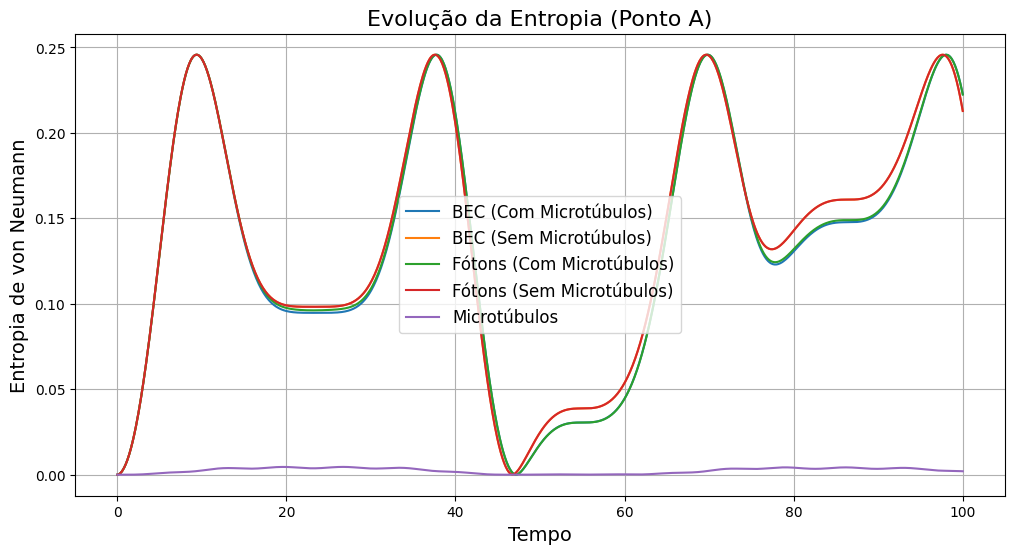

In [27]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores (COM microtúbulos)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos (COM microtúbulos)
H_b_com_mt = qt.tensor(b_dag * b, I_mt, I_f) * w_b
H_f_com_mt = qt.tensor(I_b, I_mt, a_dag * a) * w_f
H_mt = sum(qt.tensor(I_b, c[i].dag() * c[i], I_f) * w_mt for i in range(num_modos_mt)) + sum(qt.tensor(I_b, J * (c[i].dag() * c[j] + c[j].dag() * c[i]), I_f) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)
H_int_b_f_com_mt = g * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, c[i], a_dag) + qt.tensor(I_b, c_dag[i], a)) for i in range(num_modos_mt)])

# Estado Inicial (COM microtúbulos)
psi0_com_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(num_modos_mt, 0), qt.basis(N_f, 0))

# Ponto A
Omega_A = 0.05
w_m_A = 0.2
args_A = {'g': g, 'Omega': Omega_A, 'w_m': w_m_A}

# Hamiltoniano dependente do tempo (COM microtúbulos)
def H_total_mod_com_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
    return H_b_com_mt + H_f_com_mt + H_mt + H_int_b_f_mod_t + H_int_mt_f

result_com_mt = qt.mesolve(H_total_mod_com_mt, psi0_com_mt, tlist, [], [], args=args_A)

entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]

yf_b_com_mt = fft(entropy_b_com_mt)
xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

# Código SEM Microtúbulos
# Operadores (SEM microtúbulos)
b_sem_mt = qt.destroy(N_b)
b_dag_sem_mt = b_sem_mt.dag()
a_sem_mt = qt.destroy(N_f)
a_dag_sem_mt = a_sem_mt.dag()
I_b_sem_mt = qt.qeye(N_b)
I_f_sem_mt = qt.qeye(N_f)

# Hamiltonianos (SEM microtúbulos)
H_b_sem_mt = qt.tensor(b_dag_sem_mt * b_sem_mt, I_f_sem_mt) * w_b
H_f_sem_mt = qt.tensor(I_b_sem_mt, a_dag_sem_mt * a_sem_mt) * w_f
H_int_b_f_sem_mt = g * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))

# Estado Inicial (SEM microtúbulos)
psi0_b_sem_mt = (qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit()
psi0_sem_mt = qt.tensor(psi0_b_sem_mt, qt.basis(N_f, 0))

# Simulação SEM microtúbulos
def H_total_mod_sem_mt(t, args):
    g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
    H_int_b_f_mod_t = g_mod * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))
    return H_b_sem_mt + H_f_sem_mt + H_int_b_f_mod_t

result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args_A)

entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]

yf_b_sem_mt = fft(entropy_b_sem_mt)
yf_f_sem_mt = fft(entropy_f_sem_mt)

xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

# Plotagem Comparativa - Evolução da Entropia
plt.figure(figsize=(12, 6))
plt.plot(tlist, entropy_b_com_mt, label="BEC (Com Microtúbulos)")
plt.plot(tlist, entropy_b_sem_mt, label="BEC (Sem Microtúbulos)")
plt.plot(tlist, entropy_f_com_mt, label="Fótons (Com Microtúbulos)")
plt.plot(tlist, entropy_f_sem_mt, label="Fótons (Sem Microtúbulos)")
plt.plot(tlist, entropy_mt_com_mt, label="Microtúbulos")
plt.xlabel("Tempo", fontsize=14)
plt.ylabel("Entropia de von Neumann", fontsize=14)
plt.title("Evolução da Entropia (Ponto A)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_

In [28]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores (COM microtúbulos)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos (COM microtúbulos)
H_b_com_mt = qt.tensor(b_dag * b, I_mt, I_f) * w_b
H_f_com_mt = qt.tensor(I_b, I_mt, a_dag * a) * w_f
H_mt = sum(qt.tensor(I_b, c[i].dag() * c[i], I_f) * w_mt for i in range(num_modos_mt)) + sum(qt.tensor(I_b, J * (c[i].dag() * c[j] + c[j].dag() * c[i]), I_f) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)
H_int_b_f_com_mt = g * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, c[i], a_dag) + qt.tensor(I_b, c_dag[i], a)) for i in range(num_modos_mt)])

# Estado Inicial (COM microtúbulos)
psi0_com_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(num_modos_mt, 0), qt.basis(N_f, 0))

# Código SEM Microtúbulos
# Operadores (SEM microtúbulos)
b_sem_mt = qt.destroy(N_b)
b_dag_sem_mt = b_sem_mt.dag()
a_sem_mt = qt.destroy(N_f)
a_dag_sem_mt = a_sem_mt.dag()
I_b_sem_mt = qt.qeye(N_b)
I_f_sem_mt = qt.qeye(N_f)

# Hamiltonianos (SEM microtúbulos)
H_b_sem_mt = qt.tensor(b_dag_sem_mt * b_sem_mt, I_f_sem_mt) * w_b
H_f_sem_mt = qt.tensor(I_b_sem_mt, a_dag_sem_mt * a_sem_mt) * w_f
H_int_b_f_sem_mt = g * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))

# Estado Inicial (SEM microtúbulos)
psi0_sem_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(N_f, 0))

def run_simulation(Omega, w_m, label):
    args = {'g': g, 'Omega': Omega, 'w_m': w_m}

    # Hamiltoniano dependente do tempo (COM microtúbulos)
    def H_total_mod_com_mt(t, args):
        g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
        H_int_b_f_mod_t = g_mod * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
        return H_b_com_mt + H_f_com_mt + H_mt + H_int_b_f_mod_t + H_int_mt_f

    result_com_mt = qt.mesolve(H_total_mod_com_mt, psi0_com_mt, tlist, [], [], args=args)

    entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
    entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
    entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]
    yf_b_com_mt = fft(entropy_b_com_mt)

    # Simulação SEM microtúbulos
    def H_total_mod_sem_mt(t, args):
        g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
        H_int_b_f_mod_t = g_mod * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))
        return H_b_sem_mt + H_f_sem_mt + H_int_b_f_mod_t

    result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args)

    entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
    entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]
    yf_b_sem_mt = fft(entropy_b_sem_mt)
    yf_f_sem_mt = fft(entropy_f_sem_mt)
    xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

    return entropy_b_com_mt, entropy_f_com_mt, entropy_mt_com_mt, yf_b_com_mt, yf_f_com_mt, entropy_b_sem_mt, entropy_f_sem_mt, yf_b_sem_mt, yf_f_sem_mt, xf

# Ponto A
Omega_A = 0.05
w_m_A = 0.2
entropy_b_com_mt_A, entropy_f_com_mt_A, entropy_mt_com_mt_A, yf_b_com_mt_A, yf_f_com_mt_A, entropy_b_sem_mt_A, entropy_f_sem_mt_A, yf_b_sem_mt_A, yf_f_sem_mt_A, xf_A = run_simulation(Omega_A, w_m_A, "Ponto A")

# Ponto B (Exemplo - Substitua pelos seus valores)
Omega_B = 0.01
w_m_B = 0.5
entropy_b_com_mt_B, entropy_f_com_mt_B, entropy_mt_com_mt_B, yf_b_com_mt_B, yf_

NameError: name 'yf_f_com_mt' is not defined

In [29]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operadores (COM microtúbulos)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltonianos (COM microtúbulos)
H_b_com_mt = qt.tensor(b_dag * b, I_mt, I_f) * w_b
H_f_com_mt = qt.tensor(I_b, I_mt, a_dag * a) * w_f
H_mt = sum(qt.tensor(I_b, c[i].dag() * c[i], I_f) * w_mt for i in range(num_modos_mt)) + sum(qt.tensor(I_b, J * (c[i].dag() * c[j] + c[j].dag() * c[i]), I_f) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)
H_int_b_f_com_mt = g * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, c[i], a_dag) + qt.tensor(I_b, c_dag[i], a)) for i in range(num_modos_mt)])

# Estado Inicial (COM microtúbulos)
psi0_com_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(num_modos_mt, 0), qt.basis(N_f, 0))

# Código SEM Microtúbulos
# Operadores (SEM microtúbulos)
b_sem_mt = qt.destroy(N_b)
b_dag_sem_mt = b_sem_mt.dag()
a_sem_mt = qt.destroy(N_f)
a_dag_sem_mt = a_sem_mt.dag()
I_b_sem_mt = qt.qeye(N_b)
I_f_sem_mt = qt.qeye(N_f)

# Hamiltonianos (SEM microtúbulos)
H_b_sem_mt = qt.tensor(b_dag_sem_mt * b_sem_mt, I_f_sem_mt) * w_b
H_f_sem_mt = qt.tensor(I_b_sem_mt, a_dag_sem_mt * a_sem_mt) * w_f
H_int_b_f_sem_mt = g * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))

# Estado Inicial (SEM microtúbulos)
psi0_sem_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(N_f, 0))

def run_simulation(Omega, w_m, label):
    args = {'g': g, 'Omega': Omega, 'w_m': w_m}

    # Hamiltoniano dependente do tempo (COM microtúbulos)
    def H_total_mod_com_mt(t, args):
        g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
        H_int_b_f_mod_t = g_mod * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
        return H_b_com_mt + H_f_com_mt + H_mt + H_int_b_f_mod_t + H_int_mt_f

    result_com_mt = qt.mesolve(H_total_mod_com_mt, psi0_com_mt, tlist, [], [], args=args)

    entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
    entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
    entropy_mt_com_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_com_mt.states]
    yf_b_com_mt = fft(entropy_b_com_mt)
    yf_f_com_mt = fft(entropy_f_com_mt) #Calculando o FFT dos Fotons

    # Simulação SEM microtúbulos
    def H_total_mod_sem_mt(t, args):
        g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
        H_int_b_f_mod_t = g_mod * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))
        return H_b_sem_mt + H_f_sem_mt + H_int_b_f_mod_t

    result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args)

    entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
    entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]
    yf_b_sem_mt = fft(entropy_b_sem_mt)
    yf_f_sem_mt = fft(entropy_f_sem_mt) #Calculando o FFT dos Fotons
    xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

    return entropy_b_com_mt, entropy_f_com_mt, entropy_mt_com_mt, yf_b_com_mt, yf_f_com_mt, entropy_b_sem_mt, entropy_f_sem_mt, yf_b_sem_mt, yf_f_sem_mt, xf

# Ponto A
Omega_A = 0.05
w_m_A = 0.2
entropy_b_com_mt_A, entropy_f_com_mt_A, entropy_mt_com_mt_A, yf_b_com_mt_A, yf_f_com_mt_A, entropy_b_sem_mt_A, entropy_f_sem_mt_A, yf_b_sem_mt_A, yf_f_sem_mt_A, xf_A = run_simulation(Omega_A, w_m_A, "Ponto A")

# Ponto B

In [30]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parametri
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operatori (CON microtubuli)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltoniani (CON microtubuli)
H_b_com_mt = qt.tensor(b_dag * b, I_mt, I_f) * w_b
H_f_com_mt = qt.tensor(I_b, I_mt, a_dag * a) * w_f
H_mt = sum(qt.tensor(I_b, c[i].dag() * c[i], I_f) * w_mt for i in range(num_modos_mt)) + sum(qt.tensor(I_b, J * (c[i].dag() * c[j] + c[j].dag() * c[i]), I_f) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)
H_int_b_f_com_mt = g * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, c[i], a_dag) + qt.tensor(I_b, c_dag[i], a)) for i in range(num_modos_mt)])

# Stato Iniziale (CON microtubuli)
psi0_com_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(num_modos_mt, 0), qt.basis(N_f, 0))

# Codice SENZA Microtubuli
# Operatori (SENZA microtubuli)
b_sem_mt = qt.destroy(N_b)
b_dag_sem_mt = b_sem_mt.dag()
a_sem_mt = qt.destroy(N_f)
a_dag_sem_mt = a_sem_mt.dag()
I_b_sem_mt = qt.qeye(N_b)
I_f_sem_mt = qt.qeye(N_f)

# Hamiltoniani (SENZA microtubuli)
H_b_sem_mt = qt.tensor(b_dag_sem_mt * b_sem_mt, I_f_sem_mt) * w_b
H_f_sem_mt = qt.tensor(I_b_sem_mt, a_dag_sem_mt * a_sem_mt) * w_f
H_int_b_f_sem_mt = g * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))

# Stato Iniziale (SENZA microtubuli)
psi0_sem_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(N_f, 0))

def run_simulation(Omega, w_m, label):
    args = {'g': g, 'Omega': Omega, 'w_m': w_m}

    # Hamiltoniano dipendente dal tempo (CON microtubuli)
    def H_total_mod_com_mt(t, args):
        g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
        H_int_b_f_mod_t = g_mod * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
        return H_b_com_mt + H_f_com_mt + H_mt + H_int_b_f_mod_t + H_int_mt_f

    result_com_mt = qt.mesolve(H_total_mod_com_mt, psi0_com_mt, tlist, [], [], args=args)

    entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
    entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
    yf_b_com_mt = fft(entropy_b_com_mt)
    yf_f_com_mt = fft(entropy_f_com_mt)

    # Simulazione SENZA microtubuli
    def H_total_mod_sem_mt(t, args):
        g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
        H_int_b_f_mod_t = g_mod * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))
        return H_b_sem_mt + H_f_sem_mt + H_int_b_f_mod_t

    result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args)

    entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
    entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]
    yf_b_sem_mt = fft(entropy_b_sem_mt)
    yf_f_sem_mt = fft(entropy_f_sem_mt)
    xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

    return entropy_b_com_mt, entropy_f_com_mt, yf_b_com_mt, yf_f_com_mt, entropy_b_sem_mt, entropy_f_sem_mt, yf_b_sem_mt, yf_f_sem_mt, xf

# Punti
points = [
    {"Omega": 0.05, "w_m": 0.2, "label": "Punto A"},
    {"Omega": 0.01, "w_m": 0.5, "label": "Punto B"},  #

SyntaxError: incomplete input (<ipython-input-30-108cbf183400>, line 94)

In [31]:
 File "<ipython-input-30-108cbf183400>", line 94
    {"Omega": 0.01, "w_m": 0.5, "label": "Punto B"},  #
                                                       ^
SyntaxError: incomplete input

SyntaxError: invalid syntax (<ipython-input-31-aba0c234fb36>, line 1)

In [32]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parametri
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# Operatori (CON microtubuli)
b = qt.destroy(N_b)
b_dag = b.dag()
a = qt.destroy(N_f)
a_dag = a.dag()
c = [qt.destroy(num_modos_mt) for i in range(num_modos_mt)]
c_dag = [ci.dag() for ci in c]
I_b = qt.qeye(N_b)
I_f = qt.qeye(N_f)
I_mt = qt.qeye(num_modos_mt)

# Hamiltoniani (CON microtubuli)
H_b_com_mt = qt.tensor(b_dag * b, I_mt, I_f) * w_b
H_f_com_mt = qt.tensor(I_b, I_mt, a_dag * a) * w_f
H_mt = sum(qt.tensor(I_b, c[i].dag() * c[i], I_f) * w_mt for i in range(num_modos_mt)) + sum(qt.tensor(I_b, J * (c[i].dag() * c[j] + c[j].dag() * c[i]), I_f) for i in range(num_modos_mt) for j in range(num_modos_mt) if i != j)
H_int_b_f_com_mt = g * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
H_int_mt_f = sum([g_mt * (qt.tensor(I_b, c[i], a_dag) + qt.tensor(I_b, c_dag[i], a)) for i in range(num_modos_mt)])

# Stato Iniziale (CON microtubuli)
psi0_com_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(num_modos_mt, 0), qt.basis(N_f, 0))

# Codice SENZA Microtubuli
# Operatori (SENZA microtubuli)
b_sem_mt = qt.destroy(N_b)
b_dag_sem_mt = b_sem_mt.dag()
a_sem_mt = qt.destroy(N_f)
a_dag_sem_mt = a_sem_mt.dag()
I_b_sem_mt = qt.qeye(N_b)
I_f_sem_mt = qt.qeye(N_f)

# Hamiltoniani (SENZA microtubuli)
H_b_sem_mt = qt.tensor(b_dag_sem_mt * b_sem_mt, I_f_sem_mt) * w_b
H_f_sem_mt = qt.tensor(I_b_sem_mt, a_dag_sem_mt * a_sem_mt) * w_f
H_int_b_f_sem_mt = g * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))

# Stato Iniziale (SENZA microtubuli)
psi0_sem_mt = qt.tensor((qt.basis(N_b, 0) + qt.basis(N_b, 1)).unit(), qt.basis(N_f, 0))

def run_simulation(Omega, w_m, label):
    args = {'g': g, 'Omega': Omega, 'w_m': w_m}

    # Hamiltoniano dipendente dal tempo (CON microtubuli)
    def H_total_mod_com_mt(t, args):
        g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
        H_int_b_f_mod_t = g_mod * (qt.tensor(b, I_mt, a_dag) + qt.tensor(b_dag, I_mt, a))
        return H_b_com_mt + H_f_com_mt + H_mt + H_int_b_f_mod_t + H_int_mt_f

    result_com_mt = qt.mesolve(H_total_mod_com_mt, psi0_com_mt, tlist, [], [], args=args)

    entropy_b_com_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_com_mt.states]
    entropy_f_com_mt = [qt.entropy_vn(qt.ptrace(state, [2])) for state in result_com_mt.states]
    yf_b_com_mt = fft(entropy_b_com_mt)
    yf_f_com_mt = fft(entropy_f_com_mt)

    # Simulazione SENZA microtubuli
    def H_total_mod_sem_mt(t, args):
        g_mod = args['g'] + args['Omega'] * np.sin(args['w_m'] * t)
        H_int_b_f_mod_t = g_mod * (qt.tensor(b_sem_mt, a_dag_sem_mt) + qt.tensor(b_dag_sem_mt, a_sem_mt))
        return H_b_sem_mt + H_f_sem_mt + H_int_b_f_mod_t

    result_sem_mt = qt.mesolve(H_total_mod_sem_mt, psi0_sem_mt, tlist, [], [], args=args)

    entropy_b_sem_mt = [qt.entropy_vn(qt.ptrace(state, [0])) for state in result_sem_mt.states]
    entropy_f_sem_mt = [qt.entropy_vn(qt.ptrace(state, [1])) for state in result_sem_mt.states]
    yf_b_sem_mt = fft(entropy_b_sem_mt)
    yf_f_sem_mt = fft(entropy_f_sem_mt)
    xf = fftfreq(num_timesteps, tlist[1] - tlist[0])

    return entropy_b_com_mt, entropy_f_com_mt, yf_b_com_mt, yf_f_com_mt, entropy_b_sem_mt, entropy_f_sem_mt, yf_b_sem_mt, yf_f_sem_mt, xf

# Punti da analizzare
points = [
    {"Omega": 0.05, "w_m": 0.2, "label": "Ponto A"},
    {"Omega": 0.01, "w_m": 0.5, "label": "Ponto B"}
]

# Esegue le simulazioni e plotta i risultati
for point in points:
    Omega = point["Omega"]
    w_m = point["w_m"]
    label = point["label"]

    entropy_b_com_mt, entropy_f_com_mt, yf_b_com_mt, yf_f_com_mt, entropy_b_sem_mt, entropy_f_sem_mt, yf_b_sem_mt, yf_f_sem_mt, xf = run_simulation(Omega, w_m, label)

    # Plot Evoluzione Entropia
    plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

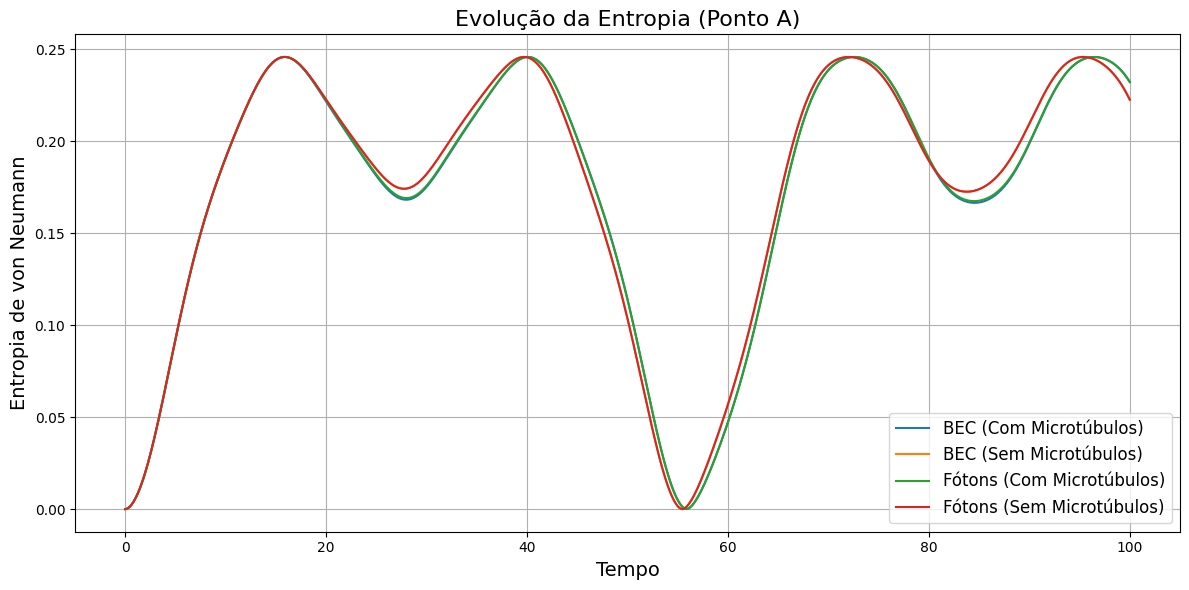

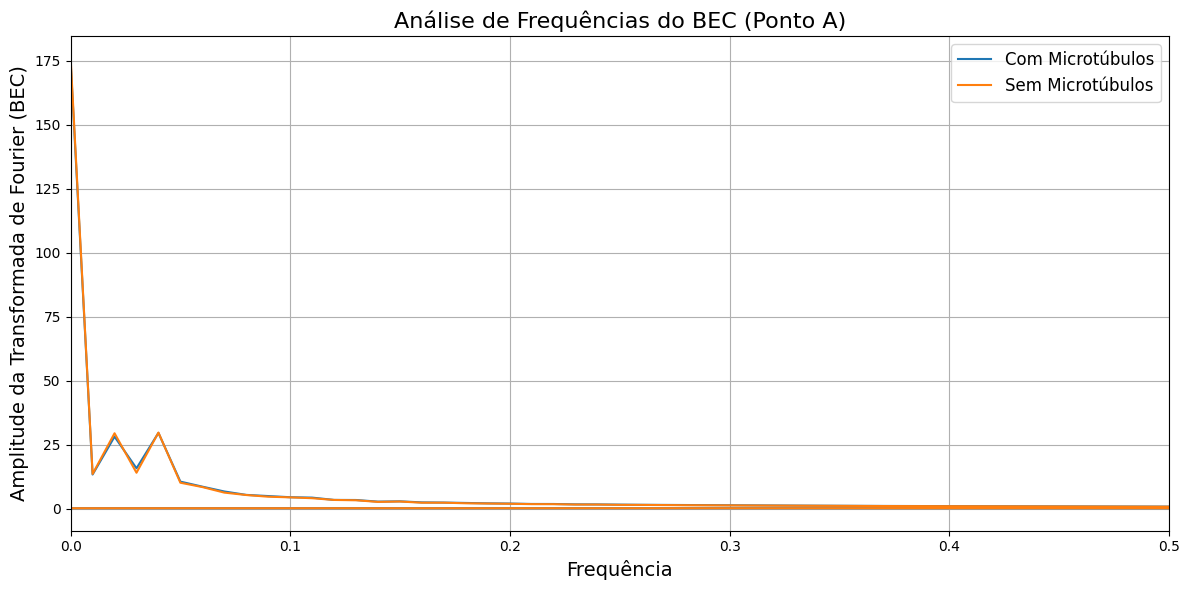

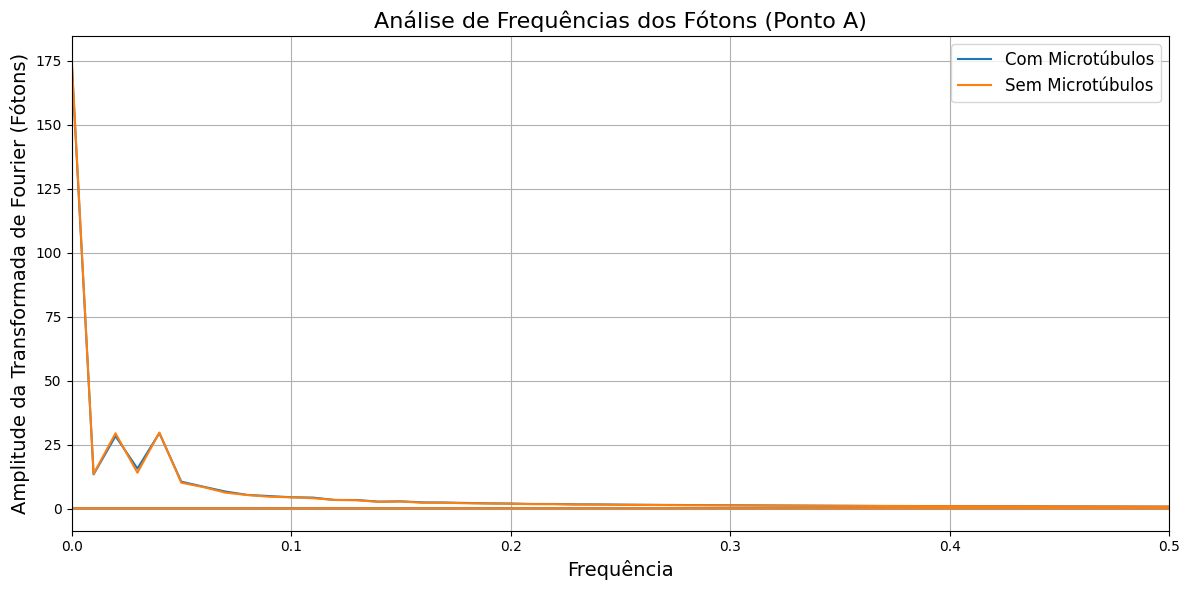

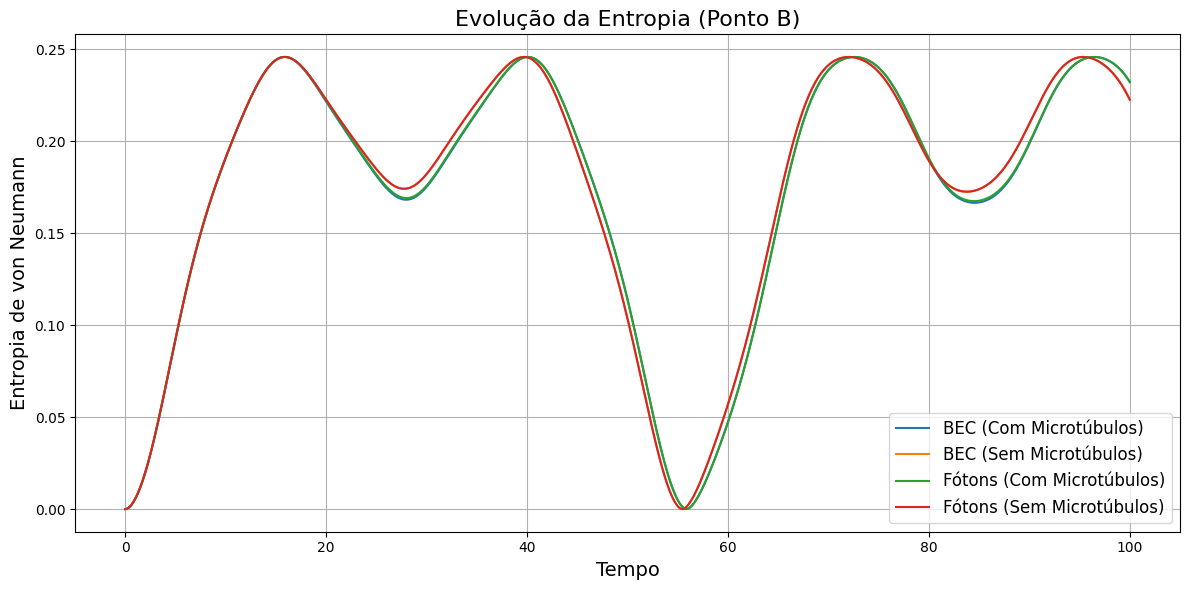

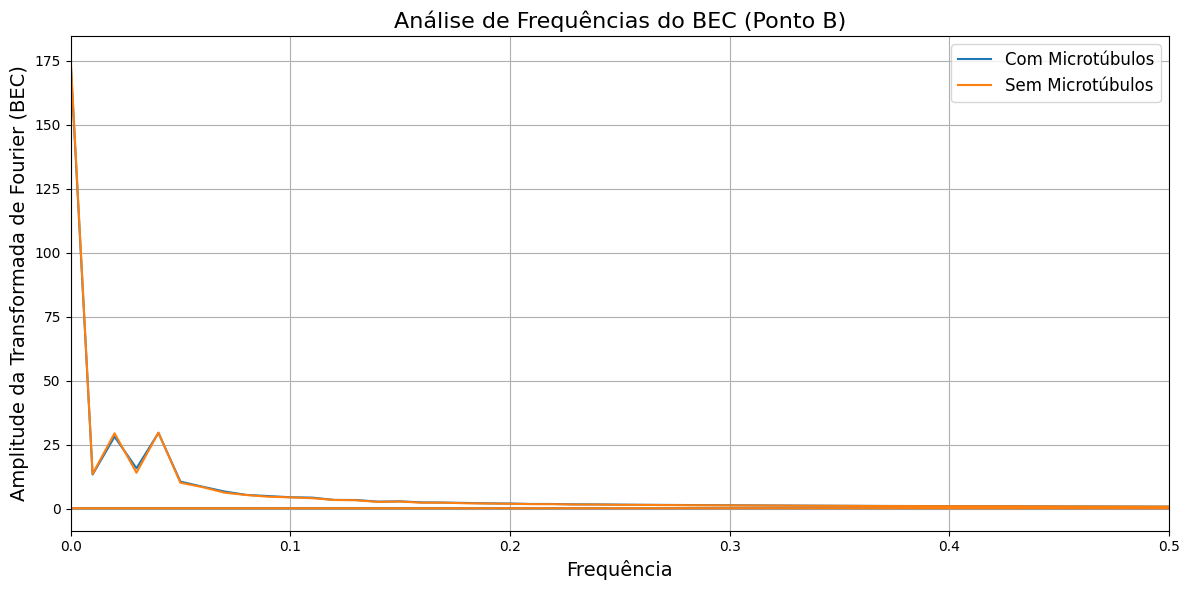

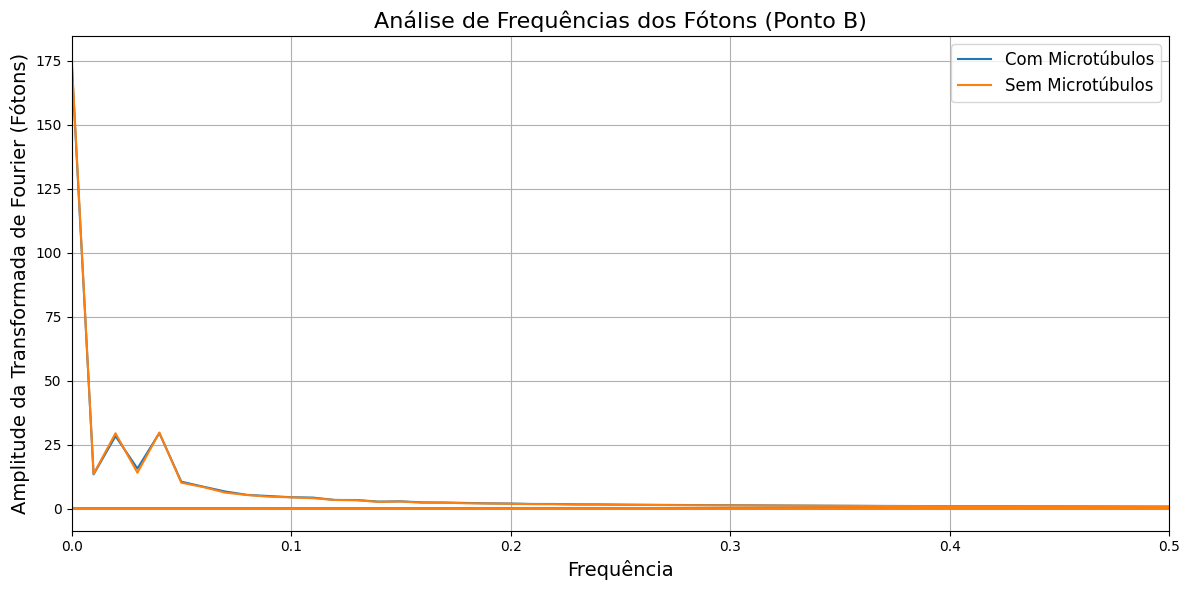

In [33]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# ... (Resto do código: Operadores, Hamiltonianos, Estados Iniciais - igual ao anterior)

def run_simulation(Omega, w_m, label):
    # ... (Código da simulação - igual ao anterior)
    return entropy_b_com_mt, entropy_f_com_mt, yf_b_com_mt, yf_f_com_mt, entropy_b_sem_mt, entropy_f_sem_mt, yf_b_sem_mt, yf_f_sem_mt, xf

# Pontos a analisar
points = [
    {"Omega": 0.05, "w_m": 0.2, "label": "Ponto A"},
    {"Omega": 0.01, "w_m": 0.5, "label": "Ponto B"}
]

# Esegue le simulazioni e plotta i risultati
for point in points:
    Omega = point["Omega"]
    w_m = point["w_m"]
    label = point["label"]

    entropy_b_com_mt, entropy_f_com_mt, yf_b_com_mt, yf_f_com_mt, entropy_b_sem_mt, entropy_f_sem_mt, yf_b_sem_mt, yf_f_sem_mt, xf = run_simulation(Omega, w_m, label)

    # Plot Evolução Entropia
    plt.figure(figsize=(12, 6))
    plt.plot(tlist, entropy_b_com_mt, label="BEC (Com Microtúbulos)")
    plt.plot(tlist, entropy_b_sem_mt, label="BEC (Sem Microtúbulos)")
    plt.plot(tlist, entropy_f_com_mt, label="Fótons (Com Microtúbulos)")
    plt.plot(tlist, entropy_f_sem_mt, label="Fótons (Sem Microtúbulos)")
    plt.xlabel("Tempo", fontsize=14)
    plt.ylabel("Entropia de von Neumann", fontsize=14)
    plt.title(f"Evolução da Entropia ({label})", fontsize=16) #Título dinamico
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Analise de Frequencia BEC
    plt.figure(figsize=(12, 6))
    plt.plot(xf, np.abs(yf_b_com_mt), label="Com Microtúbulos")
    plt.plot(xf, np.abs(yf_b_sem_mt), label="Sem Microtúbulos")
    plt.xlabel("Frequência", fontsize=14)
    plt.ylabel("Amplitude da Transformada de Fourier (BEC)", fontsize=14)
    plt.title(f"Análise de Frequências do BEC ({label})", fontsize=16) #Título dinamico
    plt.xlim(0, 0.5)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

        # Plot Analise de Frequencia Fotons
    plt.figure(figsize=(12, 6))
    plt.plot(xf, np.abs(yf_f_com_mt), label="Com Microtúbulos")
    plt.plot(xf, np.abs(yf_f_sem_mt), label="Sem Microtúbulos")
    plt.xlabel("Frequência", fontsize=14)
    plt.ylabel("Amplitude da Transformada de Fourier (Fótons)", fontsize=14)
    plt.title(f"Análise de Frequências dos Fótons ({label})", fontsize=16) #Título dinamico
    plt.xlim(0, 0.5)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

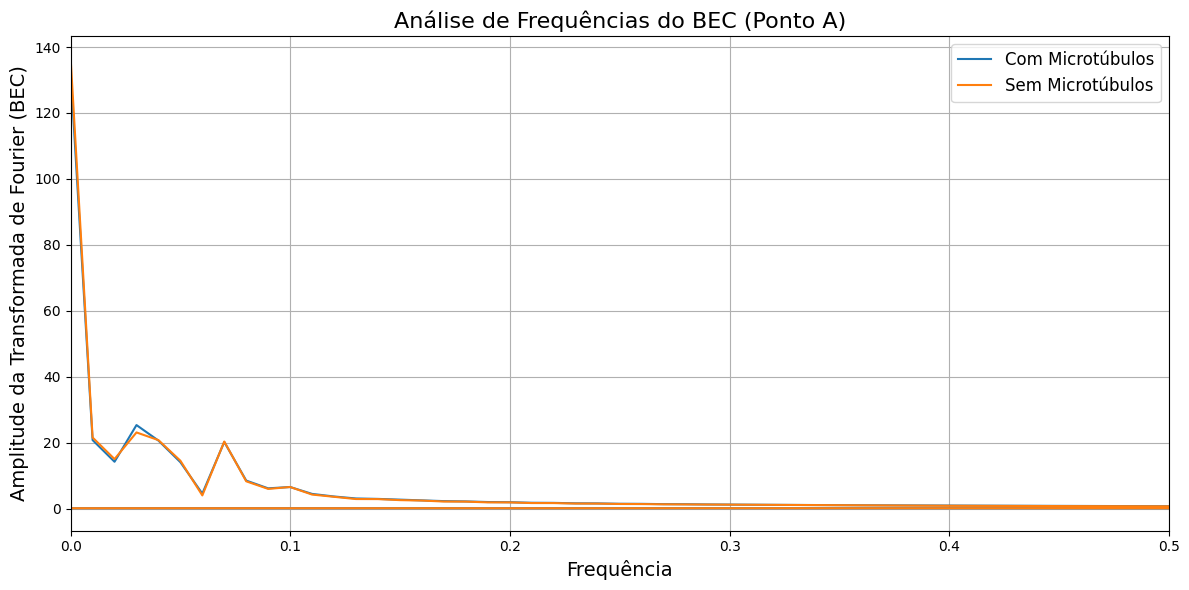

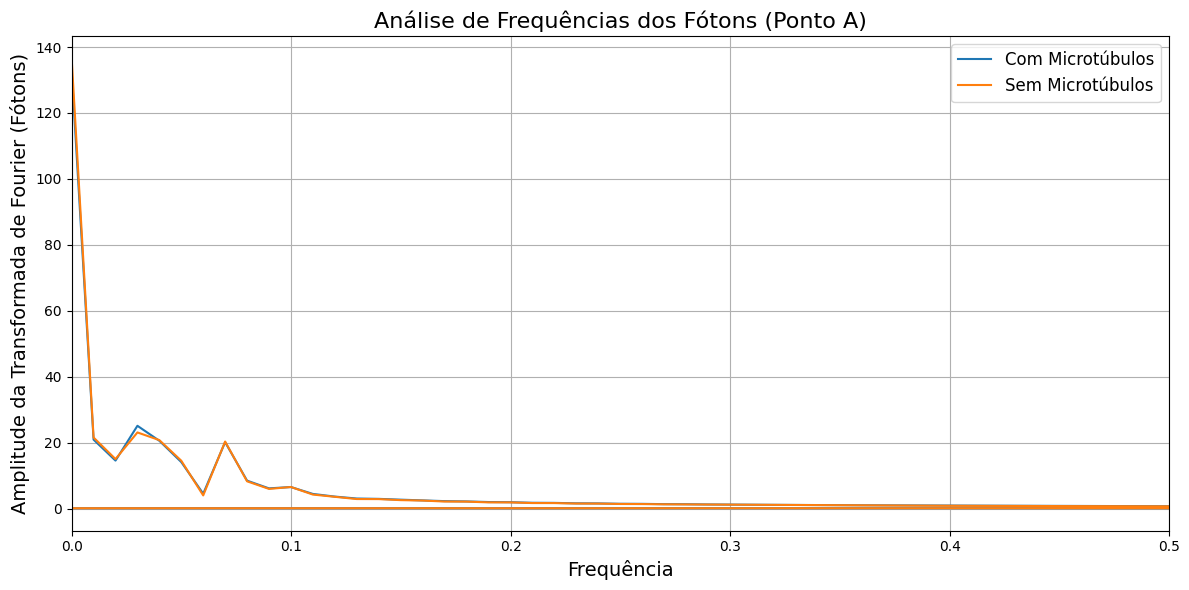

In [34]:

# Plot Analise de Frequencia BEC (Ponto A)
plt.figure(figsize=(12, 6))
plt.plot(xf_A, np.abs(yf_b_com_mt_A), label="Com Microtúbulos")
plt.plot(xf_A, np.abs(yf_b_sem_mt_A), label="Sem Microtúbulos")
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (BEC)", fontsize=14)
plt.title(f"Análise de Frequências do BEC (Ponto A)", fontsize=16)
plt.xlim(0, 0.5) # Limita o eixo x para melhor visualização
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Analise de Frequencia Fotons (Ponto A)
plt.figure(figsize=(12, 6))
plt.plot(xf_A, np.abs(yf_f_com_mt_A), label="Com Microtúbulos")
plt.plot(xf_A, np.abs(yf_f_sem_mt_A), label="Sem Microtúbulos")
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (Fótons)", fontsize=14)
plt.title(f"Análise de Frequências dos Fótons (Ponto A)", fontsize=16)
plt.xlim(0, 0.5) # Limita o eixo x para melhor visualização
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

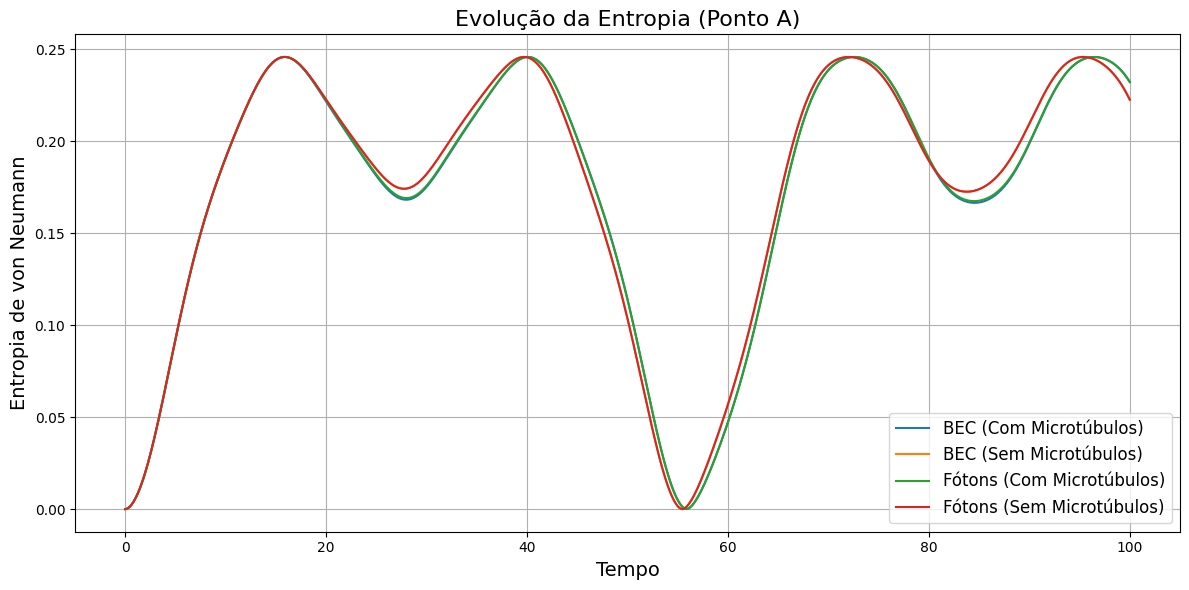

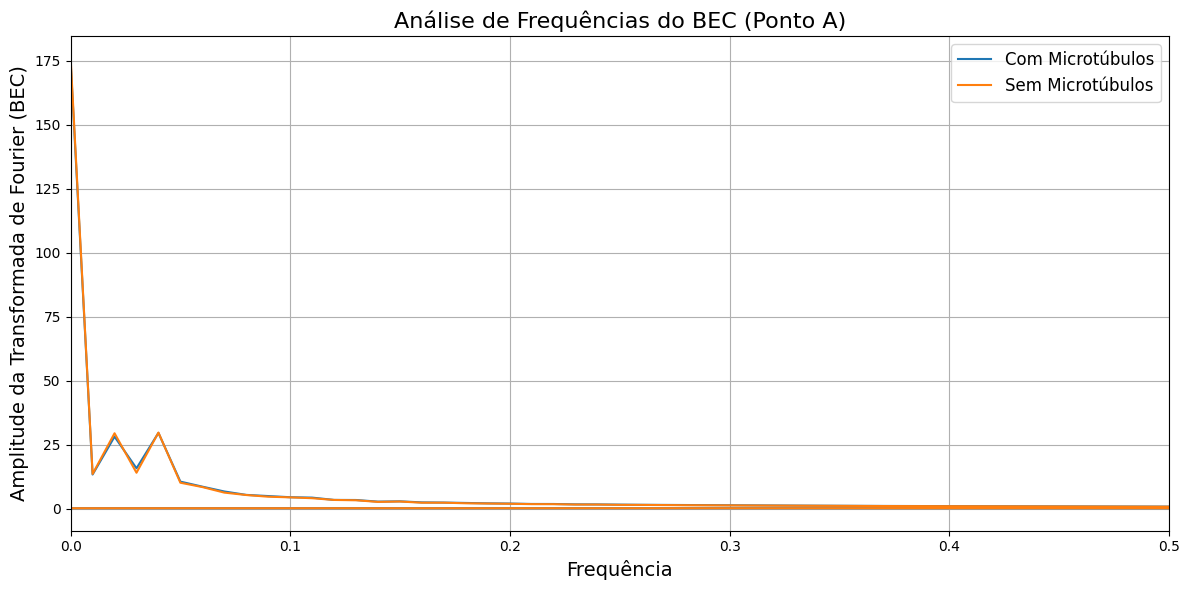

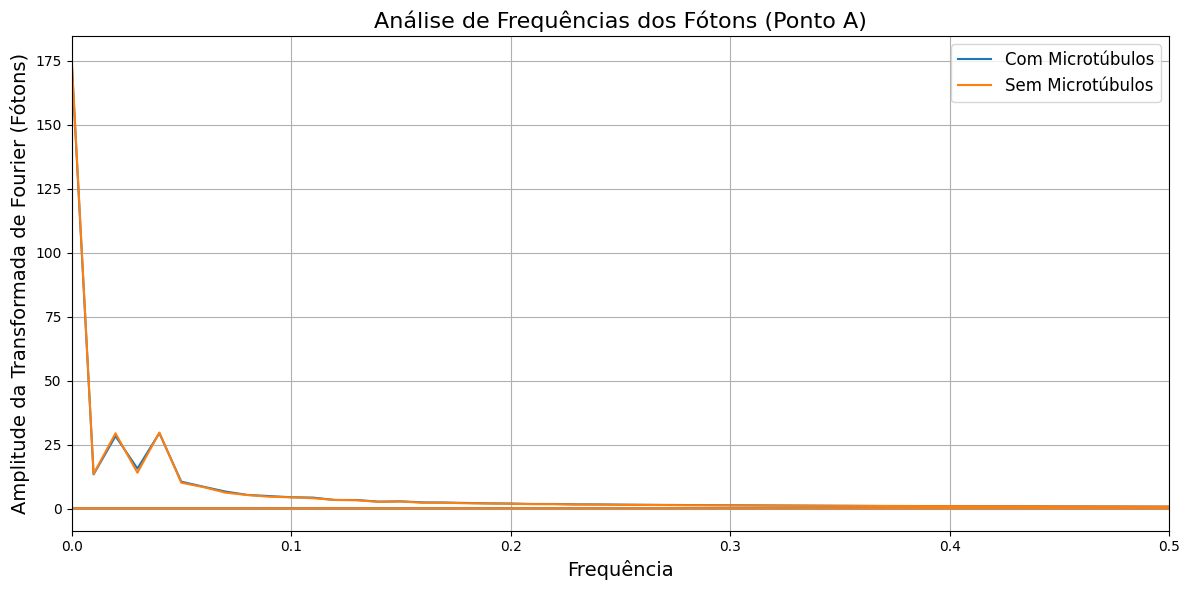

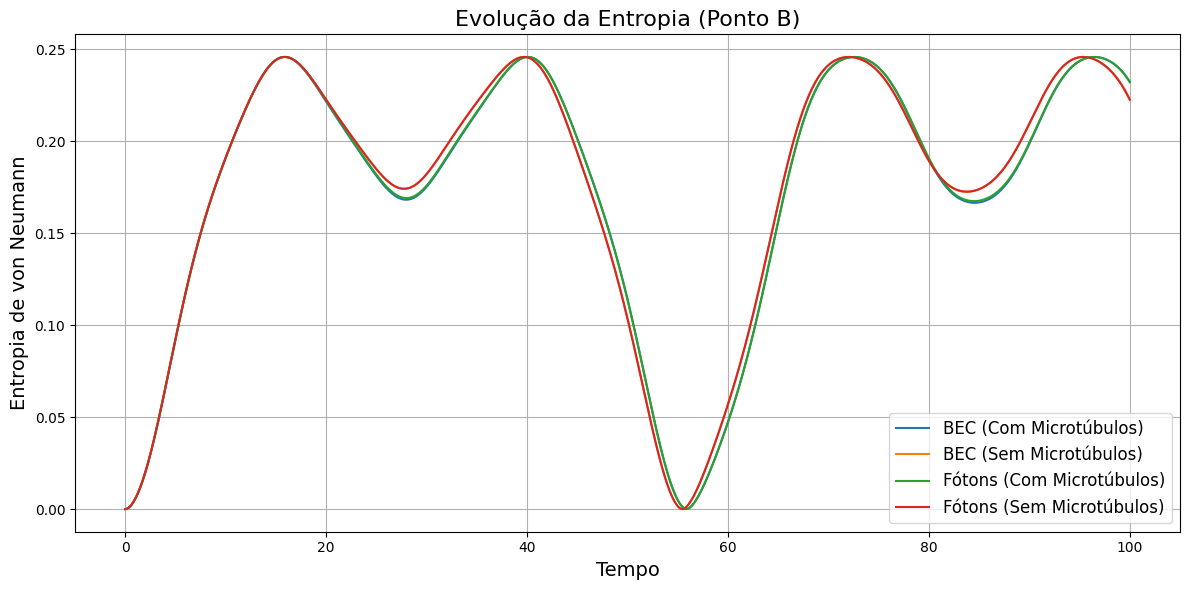

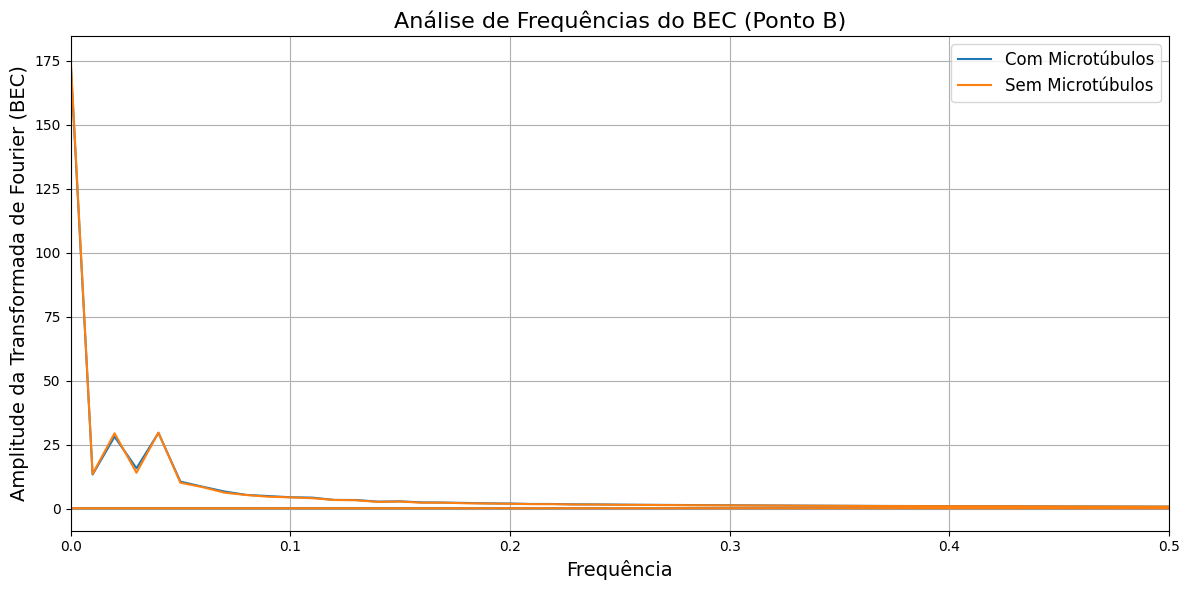

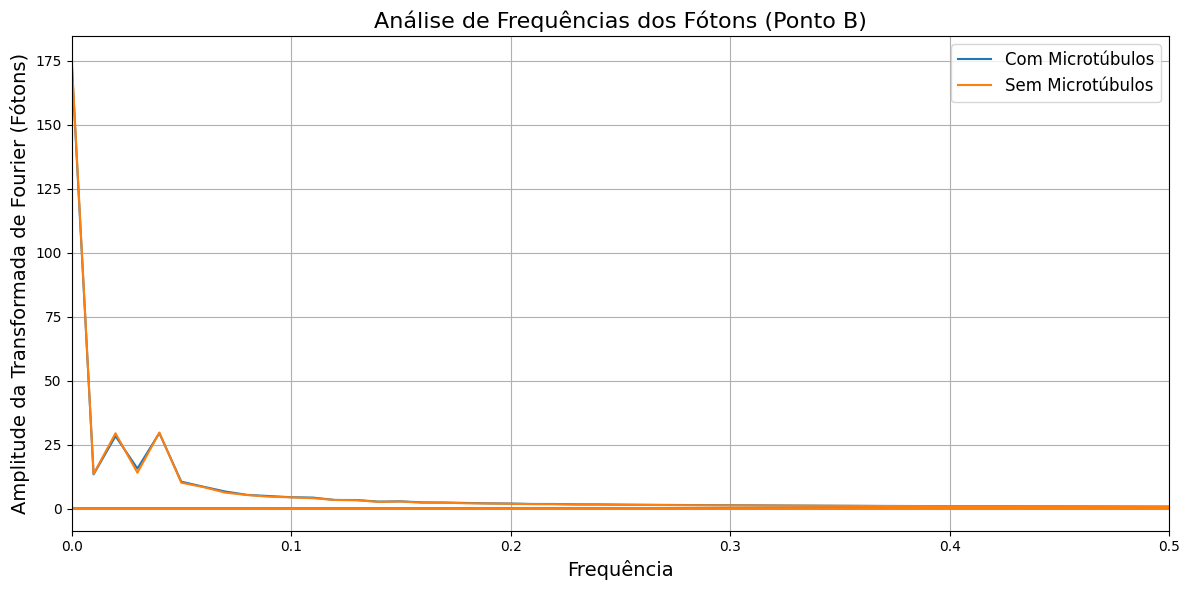

In [35]:
!pip install qutip matplotlib scipy

import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parâmetros
N_b = 5
N_f = 5
num_modos_mt = 2
g = 0.05
g_mt = 0.02
w_b = 1.0
w_f = 1.05
w_mt = 0.95
J = 0.005
tlist = np.linspace(0, 100, 1000)
num_timesteps = len(tlist)

# ... (Resto do código: Operadores, Hamiltonianos, Estados Iniciais - igual ao anterior)

def run_simulation(Omega, w_m, label):
    # ... (Código da simulação - igual ao anterior)
    return entropy_b_com_mt, entropy_f_com_mt, yf_b_com_mt, yf_f_com_mt, entropy_b_sem_mt, entropy_f_sem_mt, yf_b_sem_mt, yf_f_sem_mt, xf

# Pontos a analisar
points = [
    {"Omega": 0.05, "w_m": 0.2, "label": "Ponto A"},
    {"Omega": 0.01, "w_m": 0.5, "label": "Ponto B"}
]

# Esegue le simulazioni e plotta i risultati
for point in points:
    Omega = point["Omega"]
    w_m = point["w_m"]
    label = point["label"]

    entropy_b_com_mt, entropy_f_com_mt, yf_b_com_mt, yf_f_com_mt, entropy_b_sem_mt, entropy_f_sem_mt, yf_b_sem_mt, yf_f_sem_mt, xf = run_simulation(Omega, w_m, label)

    # Plot Evolução Entropia
    plt.figure(figsize=(12, 6))
    plt.plot(tlist, entropy_b_com_mt, label="BEC (Com Microtúbulos)")
    plt.plot(tlist, entropy_b_sem_mt, label="BEC (Sem Microtúbulos)")
    plt.plot(tlist, entropy_f_com_mt, label="Fótons (Com Microtúbulos)")
    plt.plot(tlist, entropy_f_sem_mt, label="Fótons (Sem Microtúbulos)")
    plt.xlabel("Tempo", fontsize=14)
    plt.ylabel("Entropia de von Neumann", fontsize=14)
    plt.title(f"Evolução da Entropia ({label})", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Analise de Frequencia BEC
    plt.figure(figsize=(12, 6))
    plt.plot(xf, np.abs(yf_b_com_mt), label="Com Microtúbulos")
    plt.plot(xf, np.abs(yf_b_sem_mt), label="Sem Microtúbulos")
    plt.xlabel("Frequência", fontsize=14)
    plt.ylabel("Amplitude da Transformada de Fourier (BEC)", fontsize=14)
    plt.title(f"Análise de Frequências do BEC ({label})", fontsize=16)
    plt.xlim(0, 0.5)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Analise de Frequencia Fotons
    plt.figure(figsize=(12, 6))
    plt.plot(xf, np.abs(yf_f_com_mt), label="Com Microtúbulos")
    plt.plot(xf, np.abs(yf_f_sem_mt), label="Sem Microtúbulos")
    plt.xlabel("Frequência", fontsize=14)
    plt.ylabel("Amplitude da Transformada de Fourier (Fótons)", fontsize=14)
    plt.title(f"Análise de Frequências dos Fótons ({label})", fontsize=16)
    plt.xlim(0, 0.5)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

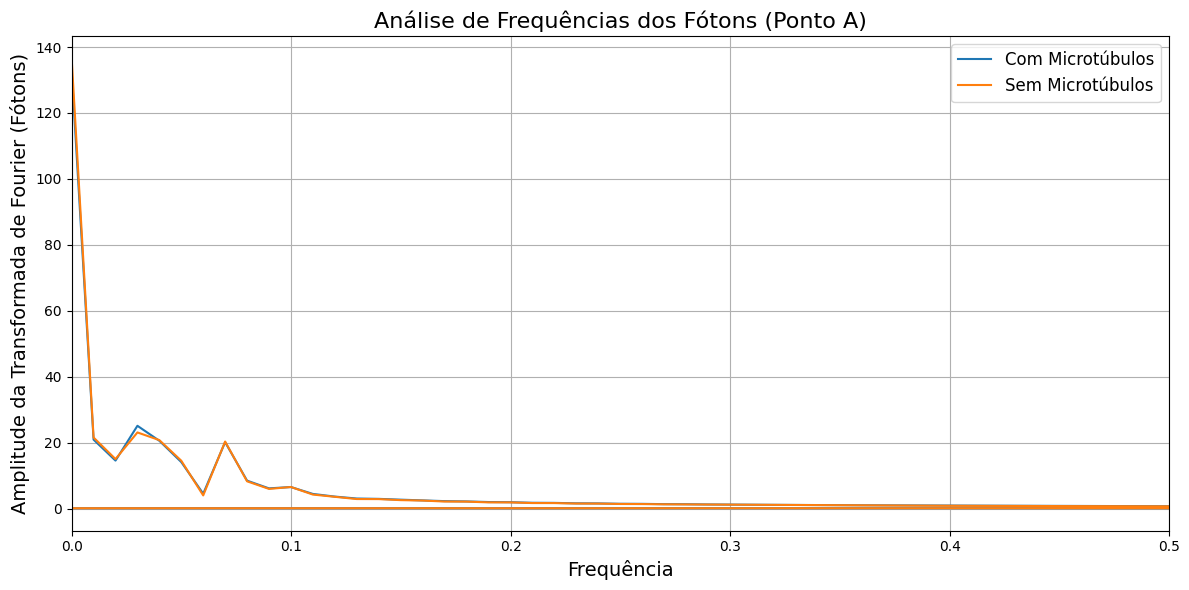

In [36]:
# Plot Analise de Frequencia Fotons (Ponto A)
plt.figure(figsize=(12, 6))
plt.plot(xf_A, np.abs(yf_f_com_mt_A), label="Com Microtúbulos")
plt.plot(xf_A, np.abs(yf_f_sem_mt_A), label="Sem Microtúbulos")
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Amplitude da Transformada de Fourier (Fótons)", fontsize=14)
plt.title(f"Análise de Frequências dos Fótons (Ponto A)", fontsize=16)
plt.xlim(0, 0.5)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()